# **I. Perkenalan**

***
Graded Challenge 6 - Clustering

Nama  : Catherine Kezia Wijaya
Batch : RMT-037

File ipynb ini berisi pembuatan model Unsupervised Machine Learning untuk mengelompokkan pengguna kartu kredit berdasarkan pola perilakunya sebagai wawasan strategi pemasaran untuk perusahaan Bank ABC
***

## Pendahuluan

### Gambaran Besar Dataset
Bank ABC telah mengumpulkan data tentang penggunaan kartu kredit selama 6 bulan terakhir, mengambil beberapa metric penting seperti balance, purchases, cash advances, dan payment fequencies untuk setiap customer. Dataset ini menyajikan wawasan yang penting tentang perilaku customer, pola pengeluaran, dan kebiasaan secara finansial.

Untuk lebih memahami, demi meningkatkan pelayanan customer, tim marketing meminta untuk melakukan analisis Customer Segmentation berdasarkan data informasi penggunaan kartu kredit. Dengan mengidentifikasikan segmen setiap customer, Bank ABC dapat menyesuaikan produk, penawaran dan strategi untuk setiap kelompok, sehingga bisa meningkatkan kepuasan dan loyalitas customer.

### Objective
- **Model K-Means**: Membuat Customer Segmentation berdasarkan perilaku penggunaan kartu kredit melalui metode clustering, khususnya algoritma K-Means. Setiap cluster yang terbentuk akan mencerminkan karakteristik dari setiap kelompok customer, seperti pola pembelian, dan banyaknya pembayaran. Penilaian performa model dinilai dengan **Silhoutte Score**
- **Rekomendasi Bisnis**: Memberikan rekomendasi bisnis berdasarkan hasil clustering untuk membantu tim marketing merancang strategi pemasaran yang lebih tepat sasaran target, seperti penawaran khusus atau peningkatan layanan.
- **Analisis Data**: Analisis ini mencakup distribusi penggunaan kartu kredit, identifikasi pola pembayaran, dan frekuensi transaksi yang dapat memberikan pengertian lebih mendalam kepada tim marketing tentang pola dan prefrensi customer.

# **II. Query SQL**

Melakukan query di Google Cloud Platform:

```
SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_037_rmt.credit-card-information`
WHERE MOD(CUST_ID, 2) <> 0
```

# **III. Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples
from scipy import stats
from phik.report import plot_correlation_matrix
import json
import pickle

import warnings
warnings.filterwarnings(action='ignore')

# **IV. Data Loading**

In [2]:
df_ori = pd.read_csv('credit-card-information`.csv')
df = df_ori.copy()
df.head(10)

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3091    3.833185           0.125000      45.00             45.00   
1     5069    0.000000           0.000000     176.03            176.03   
2     6075  757.964752           0.875000     157.40            157.40   
3     6291  264.566591           0.375000    1150.00           1150.00   
4     7755  440.613643           1.000000     600.00            600.00   
5     8299  611.561026           1.000000     765.00            765.00   
6     8629    0.228572           0.125000      60.00             60.00   
7     8805  105.333584           0.375000     306.00            306.00   
8        7   16.379412           0.454545     178.15              0.00   
9       91  559.151424           1.000000      94.00             94.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00           0.0                0.125   
1                    0.00           0.0                0.125   
2                    0.00           0.0                0.125   
3                    0.00           0.0                0.125   
4                    0.00           0.0                0.125   
5                    0.00           0.0                0.125   
6                    0.00           0.0                0.125   
7                    0.00           0.0                0.125   
8                  178.15           0.0                0.250   
9                    0.00           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                              0.00   
1                       0.125                              0.00   
2                       0.125                              0.00   
3                       0.125                              0.00   
4                       0.125                              0.00   
5                       0.125                              0.00   
6                       0.125                              0.00   
7                       0.125                              0.00   
8                       0.000                              0.25   
9                       0.250                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   
5                     0.0                 0              1        2000.0   
6                     0.0                 0              1        1500.0   
7                     0.0                 0              2        6000.0   
8                     0.0                 0              3        5000.0   
9                     0.0                 0              3        5500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000               NaN          0.000000       8  
1     0.000000               NaN          0.000000       8  
2  1494.480376       2638.598410          0.000000       8  
3  3029.380326         85.428885          0.000000       8  
4   215.316424        137.846006          0.000000       8  
5   204.464151        146.352314          0.000000       8  
6   438.738982               NaN          0.000000       8  
7   101.986927        118.324082          0.000000       8  
8   229.376368         89.613822          0.181818      12  
9   254.733329        218.279194          0.000000      12

In [3]:
df.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     6809  4438.521324           1.000000     591.84            109.16   
4466     7211  1135.703750           1.000000      92.07              0.00   
4467     8295   185.984965           0.454545     482.24            392.24   
4468     8855  3531.167073           0.900000     797.50            577.83   
4469     2389  1917.895730           1.000000     285.07            285.07   
4470     2345  9629.808851           1.000000       0.00              0.00   
4471     6785  1040.030221           1.000000       0.00              0.00   
4472     7347  1322.818587           1.000000       0.00              0.00   
4473     8447  1060.391273           1.000000       0.00              0.00   
4474     1995  3447.674222           1.000000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                  482.68    564.365429             0.636364   
4466                   92.07     81.509491             0.272727   
4467                   90.00    903.843591             0.272727   
4468                  219.67   5273.226918             0.700000   
4469                    0.00   6084.858872             0.363636   
4470                    0.00   4372.393835             0.000000   
4471                    0.00   1390.648290             0.000000   
4472                    0.00    762.301096             0.000000   
4473                    0.00   1475.858013             0.000000   
4474                    0.00   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.181818                          0.454545   
4466                    0.000000                          0.181818   
4467                    0.181818                          0.090909   
4468                    0.400000                          0.500000   
4469                    0.363636                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.000000                          0.000000   
4473                    0.000000                          0.000000   
4474                    0.090909                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 3             11       17000.0   
4466                0.272727                 3              3        1200.0   
4467                0.272727                 8              8        1200.0   
4468                0.900000                33             21        4000.0   
4469                1.090909                28              6        3000.0   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465  5552.601399       1094.486286              0.00      11  
4466   355.798199        434.689529              0.00      11  
4467  2333.997439        160.900585              0.25      11  
4468  2979.546700       3052.080103              0.00      10  
4469  5692.682993        556.449635              0.00      11  
4470  2468.988022       2134.295731              0.00      11  
4471   290.129620        287.994171              0.00      11  
4472  1035.627320        312.835530              0.00      11  
4473   407.360560        277.084736              0.00      11  
4474   665.239171        817.844662              0.00      11

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

- Data type setiap kolom sudah benar
- Terdapat missing value pada kolom `MINIMUM_PAYMENTS`

>Menampilkan nama kolom pada data

In [5]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [6]:
df.duplicated().sum()

0

Semua kolom pada data sudah bersifat numerikal, hanya CUST_ID adalah data redundan karena merupakan ID customer yang tidak berpengaruh dalam mendefinisikan karakteristik customer, perlu didrop

In [7]:
num_col = df.drop('CUST_ID', axis = 1).columns

# **V. Exploratory Data Analysis (EDA)**

## **Pertanyaan 1**: Apakah terdapat pola antara pengaruh `TENURE` dengan variabel `PURCHASES`, `BALANCE`, dan `PAYMENTS`?

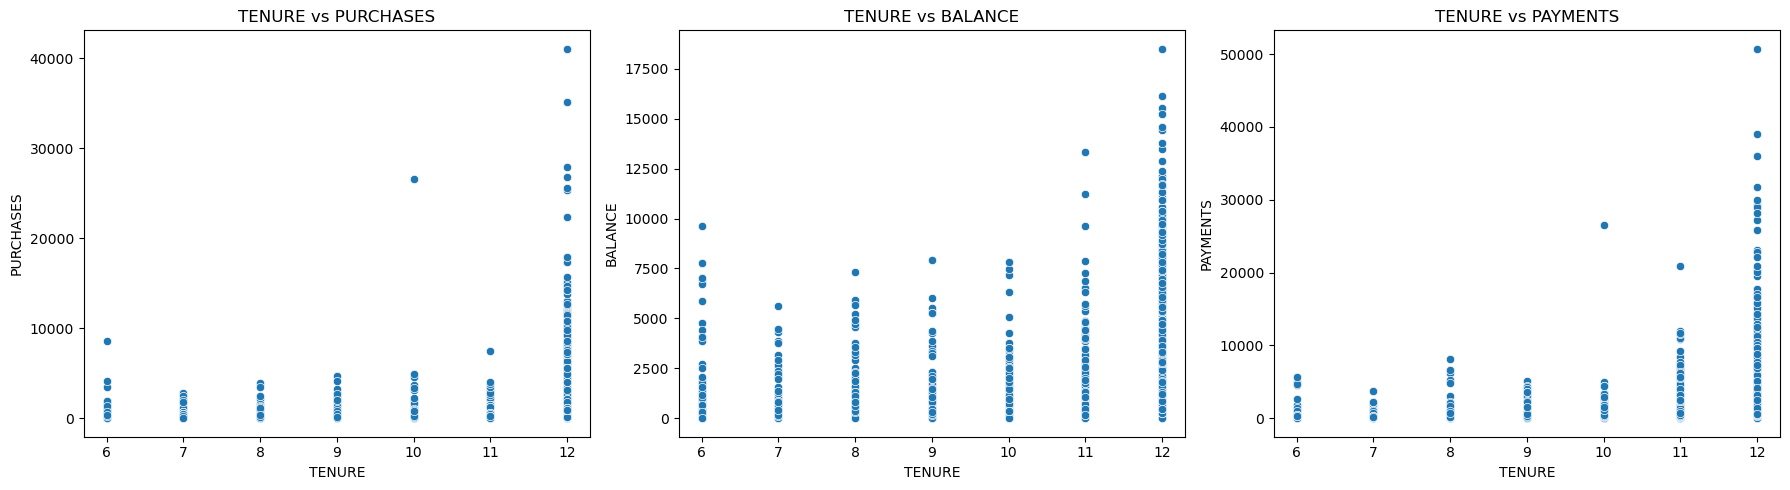

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# hubungan TENURE dengan PURCHASES
sns.scatterplot(x='TENURE', y='PURCHASES', data=df, ax=axs[0])
axs[0].set_title("TENURE vs PURCHASES")

# hubungan TENURE dengan BALANCE
sns.scatterplot(x='TENURE', y='BALANCE', data=df, ax=axs[1])
axs[1].set_title("TENURE vs BALANCE")

# hubungan TENURE dengan PAYMENTS
sns.scatterplot(x='TENURE', y='PAYMENTS', data=df, ax=axs[2])
axs[2].set_title("TENURE vs PAYMENTS")

plt.tight_layout()
plt.show()

- **Analisis**: Dari keseluruhan grafik, meskipun ada naik turun pada `TENURE` ke 6 - 9, dapat disimpulkan bahwa semakin lama `TENURE` maka pola `PURCHASES`, `BALANCE`, dan `PAYMENTS` semakin meningkat. Hal ini menunjukkan bahwa customer yang telah menggunakan kartu kredit dengan waktu yang lebih lama cenderung melakukan lebih banyak pembelian, memiliki saldo yang lebih tinggi, dan melakukan pembayaran yang lebih besar.
- **Rekomendasi**: 
    - Menawarkan diskon atau cashback untuk mendorong peningkatan pembelian, seperti promosi pada customer dengan `TENURE` yang tinggi.
    - Menawarkan kenaikan limit kredit untuk customer dengan `TENURE` lama dan memiliki riwayat pembayaran yang baik
    - Menawarkan program loyalitas yang memberikan poin rewards bagi customer dengan `TENURE` yang lebih lama dan saldo yang tinggi.

## **Pertanyaan 2**: Apakah nasabah dengan CREDIT_LIMIT yang tinggi cenderung lebih sering melakukan pembelian ?

Dari gambar yang disediakan oleh __[Investopedia](https://www.investopedia.com/terms/c/credit_limit.asp)__:
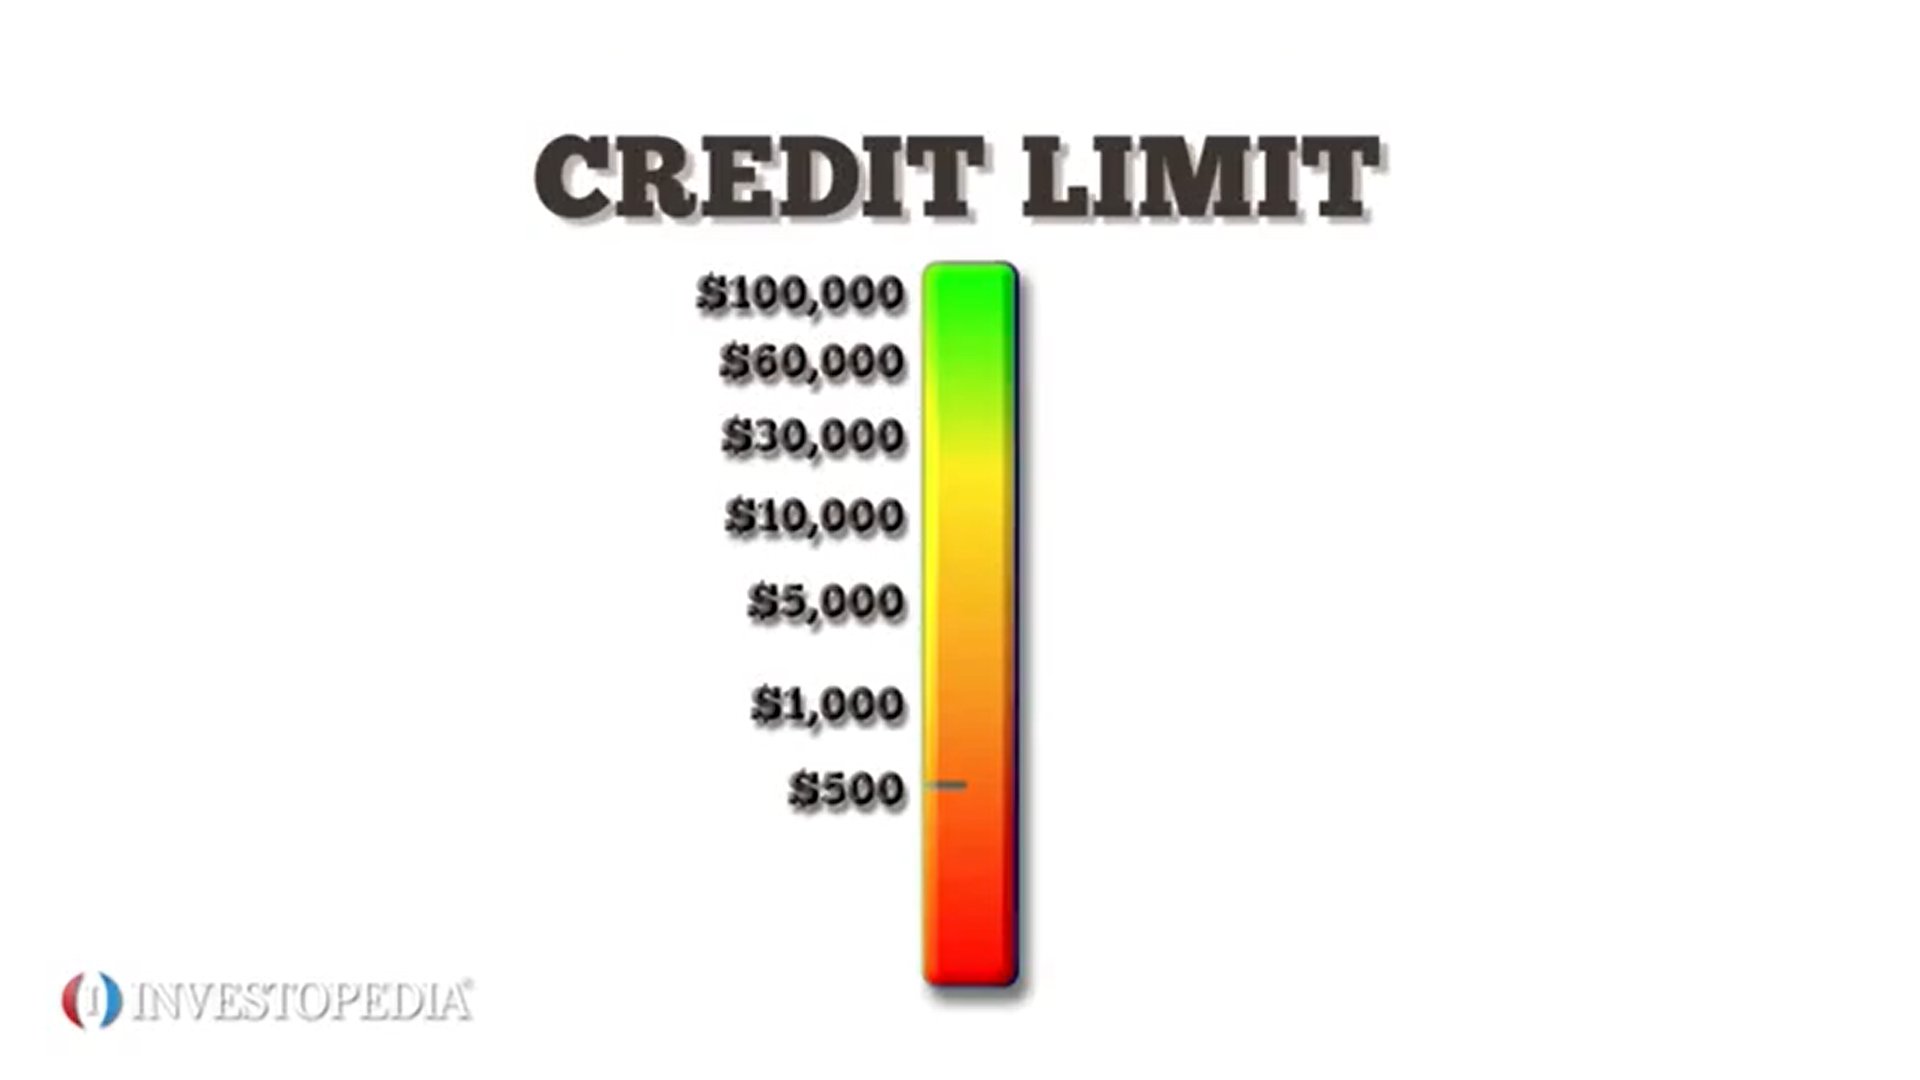

Credit limit akan dikategorikan menjadi 3 macam sesuai dengan warnanya yaitu:
- **Low**: Limit <= 5000 (merah - orange)
- **Medium**: Limit > 5000 dan Limit < 30000 (kuning)
- **High**: Limit => 30000 dan Limit < 60000 (hijau)
- **Very High**: Limit => 60000 (hijau)

In [9]:
#Buat fungsi untuk menkategorikan

def categorize_credit_limit(limit):
    if limit <= 5000:
        return 'Low'
    elif 5000 < limit < 30000:
        return 'Medium'
    elif 30000 <= limit < 60000:
        return 'High'
    else:
        return 'Very High'

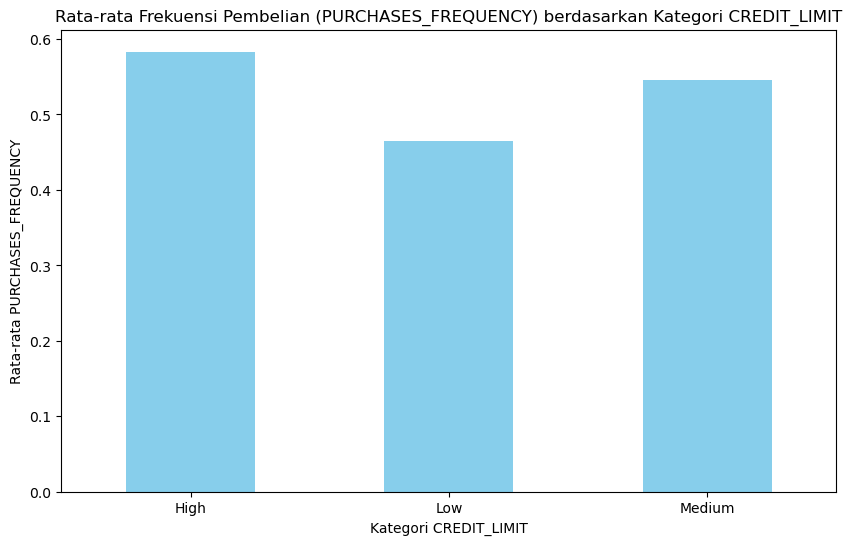

In [10]:
#aplikasikan fungsi ke kolom CREDIT_LIMIT
eda = df.copy()
eda['CREDIT_LIMIT_CATEGORY'] = eda['CREDIT_LIMIT'].apply(categorize_credit_limit)

# Menghitung rata-rata PURCHASES_FREQUENCY untuk setiap kategori CREDIT_LIMIT
average_purchases_frequency = eda.groupby('CREDIT_LIMIT_CATEGORY')['PURCHASES_FREQUENCY'].mean().sort_index()

# Membuat bar chart
plt.figure(figsize=(10, 6))
average_purchases_frequency.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Frekuensi Pembelian (PURCHASES_FREQUENCY) berdasarkan Kategori CREDIT_LIMIT')
plt.xlabel('Kategori CREDIT_LIMIT')
plt.ylabel('Rata-rata PURCHASES_FREQUENCY')
plt.xticks(rotation=0)
plt.show()

**Analisis**: 
- Tidak ada customer yang berada di kategori `Very High`
- Frekuensi pembelian paling banyak pada kategori `High`, diikuti dengan `Medium` dan yang paling rendah adalah `Low`, hal ini menandakan bahwa semakin tinggi `CREDIT_LIMIT`, maka semakin tinggi banyak juga frekuensi pembelian.

**Rekomendasi**: 
- Merancang promosi atau diskon untuk pengguna kartu kredit kategori `Low` yang dapat menarik mereka untuk melakukan lebih banyak pembelian
- Jika pelanggan dengan limit kredit kategori `Medium` menunjukkan potensi pembelian yang lebih tinggi, pertimbangkan untuk meningkatkan credit limit mereka.

## Melihat relasi antara setiap variabel

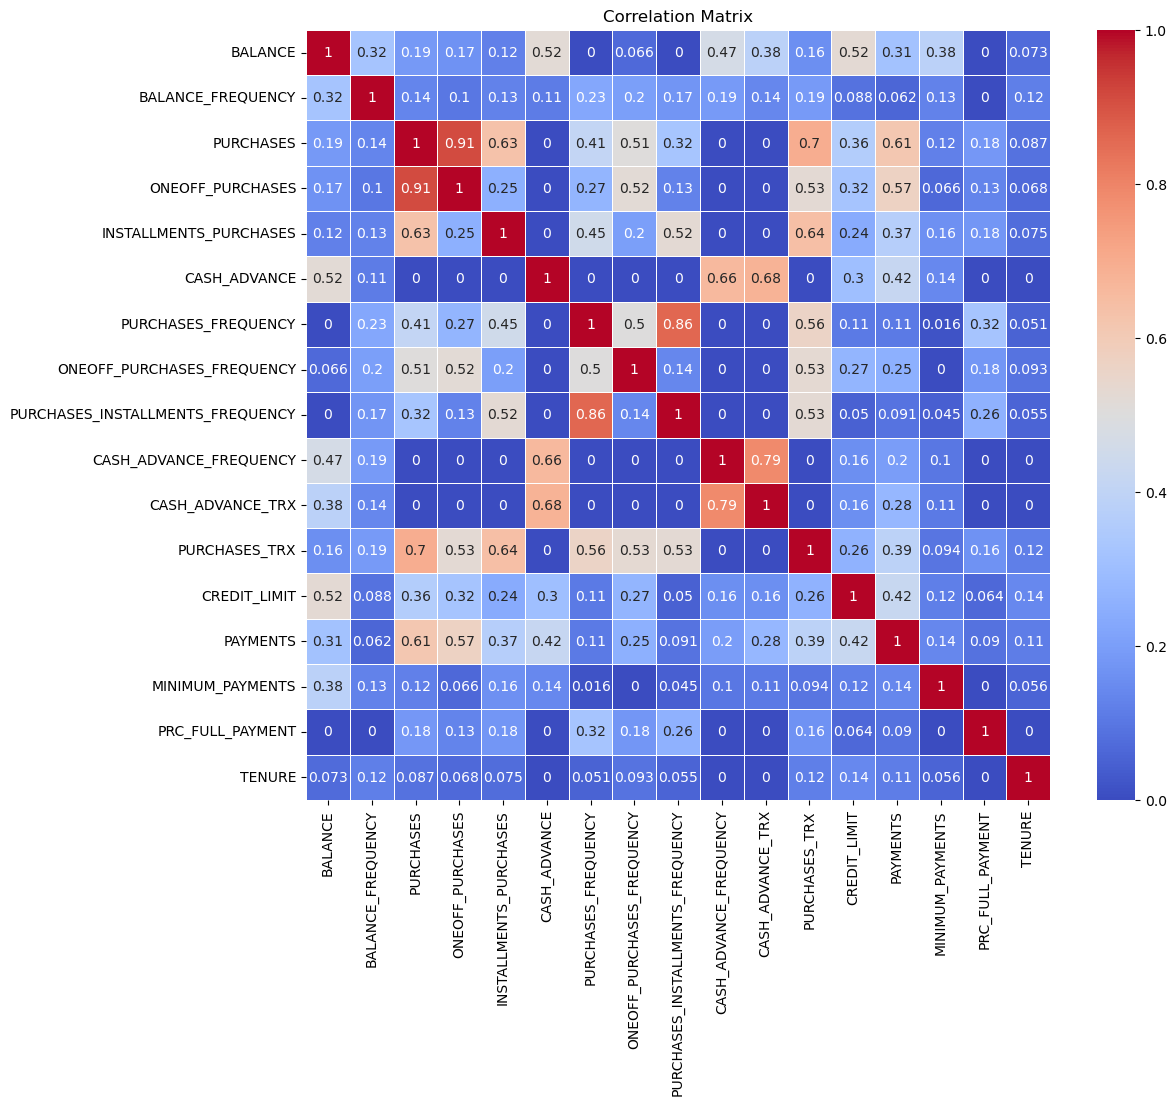

In [11]:
#See correlation with pearson between all variables

correlation_matrix = df[num_col].corr(numeric_only=True)
# Membatasi nilai korelasi antara 0 hingga 1
correlation_matrix_limited = correlation_matrix.clip(lower=0, upper=1)

# Plot heatmap untuk matriks korelasi yang sudah dibatasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_limited, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- Terdapat multicolinearity pada beberapa variabel, terutama diantara `PURCHASES` dan `ONEOFF_PURCHASES` dan juga diantara `PURCHASES_FREQUENCY`dan `PURCHASES_INSTALLMENTS_FREQUENCRY`
- Terdapat relasi yang kuat  antara beberapa variabel, seperti `PURCHASES_TRX` dan `PURCHASES`, juga antara `CASH_ADVANCE` dan `CASH_ADVANCE_TRX`

Dari kolerasi yang sudah ditampilkan, ingin melihat lebih jelas seperti apa relasi antar variabel yang memiliki nilai korelasi yang tinggi

## Lihat distribusi pada semua kolom

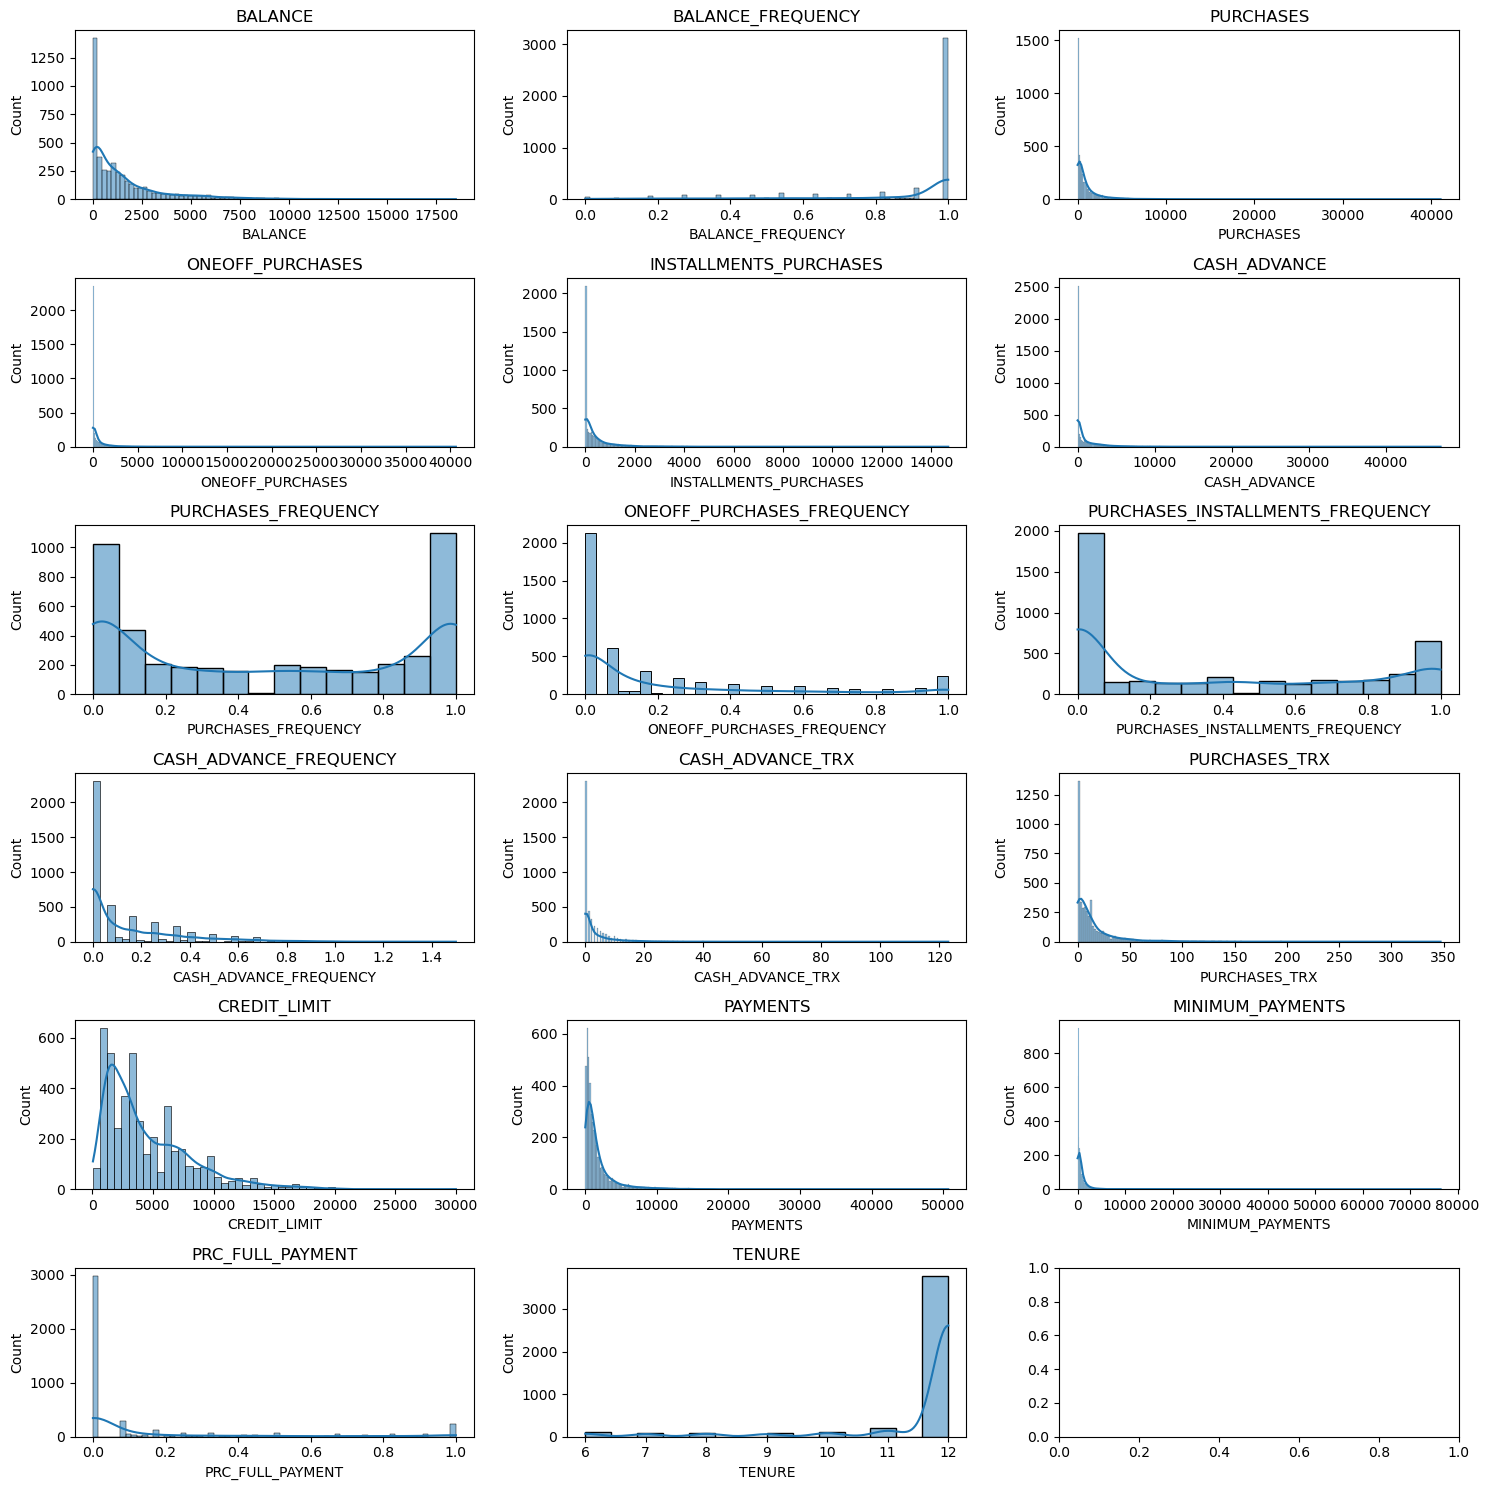

In [12]:
#Melihat distribusi tiap kolom

# buat figure dan axes
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms with KDE
for i, column in enumerate(num_col):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_title(column)

# Display plot
plt.tight_layout()
plt.show()

Mayoritas data berdistribusi extremely skewed, kecuali kolom `PURCHASES_FREQUENCY` dan `PURCHASES_INSTALLMENTS_FREQUENCY` yang berdistribusi normal

## Statistik Deskriptif Data

In [13]:
df[num_col].describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   4475.000000        4475.000000   4475.000000       4475.000000   
mean    1563.205717           0.876933   1003.251343        596.369893   
std     2072.045789           0.238222   2060.034730       1653.425984   
min        0.000000           0.000000      0.000000          0.000000   
25%      124.432849           0.888889     39.560000          0.000000   
50%      871.355430           1.000000    360.000000         45.650000   
75%     2047.570799           1.000000   1102.420000        575.220000   
max    18495.558550           1.000000  41050.400000      40624.060000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             4475.000000   4475.000000          4475.000000   
mean               407.110215    984.288554             0.490579   
std                880.799744   2060.448056             0.402907   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 88.620000      0.000000             0.500000   
75%                455.885000   1138.887754             0.916667   
max              14686.100000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 4475.000000                       4475.000000   
mean                     0.202301                          0.363886   
std                      0.298203                          0.397603   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.250000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             4475.000000       4475.000000    4475.000000   4475.000000   
mean                 0.136132          3.301229      14.929162   4494.878630   
std                  0.201036          7.134727      25.540814   3609.267706   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.250000          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     347.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   4475.000000       4320.000000       4475.000000  4475.000000  
mean    1740.075430        873.976757          0.150224    11.518212  
std     2827.633858       2436.877272          0.289081     1.328925  
min        0.000000          0.019163          0.000000     6.000000  
25%      376.913051        168.590144          0.000000    12.000000  
50%      877.494612        313.980229          0.000000    12.000000  
75%     1911.596530        819.371080          0.125000    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

- Terdapat variasi yang signifikan dalam beberapa variabel, contohnya, dalam kolom `BALANCE`, `CREDIT_LIMIT`, dan `PAYMENTS`, yang menunjukkan perbedaan antara customer dengan jumlah saldo, credit limit, dan pembayaran yang besar atau kecil.
- Banyak pelanggan memiliki frekuensi pembelian dan transaksi yang cukup rendah (dari kolom `PURCHASES_FREQUENCY`, `CASH_ADVANCE_FREQUENCY`), tetapi ada beberapa pelanggan memiliki transaksi yang sangat tinggi.
- Rata - rata `CASH_ADVANCE` bernilai 984.29, tetapi ada customer dengan nilai yang sangat tinggi hingga 47,137.21, juga dengan `CASH_ADVANCE_TRX` rata - ratanya 3.30 dengan nilai transaksi tertinggi 123. Hal ini menunjukkan perbedaan yang besar dalam pola pengambilan uang tunai di antara customer.
- Untuk variabel pembayaran, seperti PRC_FULL_PAYMENT, hanya sebagian kecil customer yang membayar penuh tagihan setiap bulan.

# **VI - Feature Engineering**

In [14]:
#Hanya digunakan kolom numerical

X = df[num_col]

print(X.shape)

(4475, 17)


Terdapat 4475 data dengan 17 variabel

## Handling Missing Value

>Menghitung missing value pada setiap kolom

In [15]:
X.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat 155 missing value pada kolom `MINIMUM_PAYMENTS` diteliti lebih lanjut seperti apa missing value-nya

In [16]:
X[X['MINIMUM_PAYMENTS'].isnull()].head(10)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       3.833185           0.125000      45.00             45.00   
1       0.000000           0.000000     176.03            176.03   
6       0.228572           0.125000      60.00             60.00   
21   1464.324632           1.000000    1174.39           1174.39   
25     16.887571           0.363636    1083.00           1083.00   
31      0.000000           0.000000       9.28              0.00   
79      0.000000           0.000000      63.30              0.00   
83     10.684577           0.181818     300.00              0.00   
100     0.000000           0.000000      37.65              0.00   
156    24.297113           0.636364     230.47              0.00   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      0.00           0.0                0.125   
1                      0.00           0.0                0.125   
6                      0.00           0.0                0.125   
21                     0.00           0.0                0.250   
25                     0.00           0.0                0.250   
31                     9.28           0.0                0.250   
79                    63.30           0.0                0.250   
83                   300.00           0.0                0.250   
100                   37.65           0.0                0.250   
156                  230.47           0.0                0.500   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.125                              0.00   
1                         0.125                              0.00   
6                         0.125                              0.00   
21                        0.250                              0.00   
25                        0.250                              0.00   
31                        0.000                              0.25   
79                        0.000                              0.25   
83                        0.000                              0.25   
100                       0.000                              0.25   
156                       0.000                              0.50   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                       0.0                 0              1         500.0   
1                       0.0                 0              1        7000.0   
6                       0.0                 0              1        1500.0   
21                      0.0                 0              8        9000.0   
25                      0.0                 0              3        1200.0   
31                      0.0                 0              3        5000.0   
79                      0.0                 0              3        2700.0   
83                      0.0                 0              3        4000.0   
100                     0.0                 0              3        1500.0   
156                     0.0                 0              7        4000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0       0.000000               NaN               0.0       8  
1       0.000000               NaN               0.0       8  
6     438.738982               NaN               0.0       8  
21      0.000000               NaN               0.0      12  
25   3905.430817               NaN               0.0      12  
31      0.000000               NaN               0.0      12  
79      0.000000               NaN               0.0      12  
83    368.807294               NaN               0.0      12  
100     0.000000               NaN               0.0      12  
156     0.000000               NaN               0.0      12

Dugaan pertama adalah Missing At Random (MAR). Dilihat dari tabel, data dengan `MISSING_PAYMENTS` NaN data `CASH_ADVANCE`, `PRC_FULL_PAYMENT`, `PURCHASES_INSTALLMENTS_FREQUENCY`, `CASH_ADVANCE_FREQUENCY` dan `CASH_ADVANCE_TRX` bernilai 0.

Menguji apakah rata-rata variabel lain berbeda secara signifikan antara data `MISSING_PAYMENTS` yang hilang dan yang tidak hilang. Akan diuji pada `CASH_ADVANCE`, dan `PRC_FULL_PAYMENT`.

In [17]:
not_missing = df[df['MINIMUM_PAYMENTS'].notna()]
missing = df[df['MINIMUM_PAYMENTS'].isna()]

# Uji t untuk perbedaan antara kelompok
t_stat, p_val = stats.ttest_ind(not_missing['CASH_ADVANCE'], missing['CASH_ADVANCE'], nan_policy='omit')
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 2.929163151668159, P-value: 0.0034159321078426528


In [18]:
not_missing = df[df['MINIMUM_PAYMENTS'].notna()]
missing = df[df['MINIMUM_PAYMENTS'].isna()]

# Uji t untuk perbedaan antara kelompok
t_stat, p_val = stats.ttest_ind(not_missing['PRC_FULL_PAYMENT'], missing['PRC_FULL_PAYMENT'], nan_policy='omit')
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 6.616161652465457, P-value: 4.1201401369910884e-11


Ada korelasi yang jelas antara `MINIMUM_PAYMENTS` yang missing dan variabel lain, menunjukkan adanya hubungan, jadi pola hilangnya data terkait dengan nilai variabel lainnya, sifat MAR terbukti. Handling missing value dilakukan dengan mengisi semua nilai `NaN` menjadi `0`

In [19]:
#Mengisi nilai NaN menjadi 0
X = X.fillna(0)

In [20]:
X

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3.833185              0.125      45.00             45.00   
1        0.000000              0.000     176.03            176.03   
2      757.964752              0.875     157.40            157.40   
3      264.566591              0.375    1150.00           1150.00   
4      440.613643              1.000     600.00            600.00   
...           ...                ...        ...               ...   
4470  9629.808851              1.000       0.00              0.00   
4471  1040.030221              1.000       0.00              0.00   
4472  1322.818587              1.000       0.00              0.00   
4473  1060.391273              1.000       0.00              0.00   
4474  3447.674222              1.000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000          0.000000               0.0       8  
1        0.000000          0.000000               0.0       8  
2     1494.480376       2638.598410               0.0       8  
3     3029.380326         85.428885               0.0       8  
4      215.316424        137.846006               0.0       8  
...           ...               ...               ...     ...  
4470  2468.988022       2134.295731               0.0      11  
4471   290.129620        287.994171               0.0      11  
4472  1035

In [21]:
X.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Sudah tidak ada Missing Value

## Handling Outlier

In [22]:
df.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     6809  4438.521324           1.000000     591.84            109.16   
4466     7211  1135.703750           1.000000      92.07              0.00   
4467     8295   185.984965           0.454545     482.24            392.24   
4468     8855  3531.167073           0.900000     797.50            577.83   
4469     2389  1917.895730           1.000000     285.07            285.07   
4470     2345  9629.808851           1.000000       0.00              0.00   
4471     6785  1040.030221           1.000000       0.00              0.00   
4472     7347  1322.818587           1.000000       0.00              0.00   
4473     8447  1060.391273           1.000000       0.00              0.00   
4474     1995  3447.674222           1.000000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                  482.68    564.365429             0.636364   
4466                   92.07     81.509491             0.272727   
4467                   90.00    903.843591             0.272727   
4468                  219.67   5273.226918             0.700000   
4469                    0.00   6084.858872             0.363636   
4470                    0.00   4372.393835             0.000000   
4471                    0.00   1390.648290             0.000000   
4472                    0.00    762.301096             0.000000   
4473                    0.00   1475.858013             0.000000   
4474                    0.00   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.181818                          0.454545   
4466                    0.000000                          0.181818   
4467                    0.181818                          0.090909   
4468                    0.400000                          0.500000   
4469                    0.363636                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.000000                          0.000000   
4473                    0.000000                          0.000000   
4474                    0.090909                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 3             11       17000.0   
4466                0.272727                 3              3        1200.0   
4467                0.272727                 8              8        1200.0   
4468                0.900000                33             21        4000.0   
4469                1.090909                28              6        3000.0   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465  5552.601399       1094.486286              0.00      11  
4466   355.798199        434.689529              0.00      11  
4467  2333.997439        160.900585              0.25      11  
4468  2979.546700       3052.080103              0.00      10  
4469  5692.682993        556.449635              0.00      11  
4470  2468.988022       2134.295731              0.00      11  
4471   290.129620        287.994171              0.00      11  
4472  1035.627320        312.835530              0.00      11  
4473   407.360560        277.084736              0.00      11  
4474   665.239171        817.844662              0.00      11

Sebelum handling outlier, perlu diketahui skewness setiap kolom

In [23]:
#Menampilkan skewness pada data
X.skew()

BALANCE                              2.329009
BALANCE_FREQUENCY                   -2.026530
PURCHASES                            7.071706
ONEOFF_PURCHASES                     9.951057
INSTALLMENTS_PURCHASES               6.330630
CASH_ADVANCE                         5.638109
PURCHASES_FREQUENCY                  0.058755
ONEOFF_PURCHASES_FREQUENCY           1.548319
PURCHASES_INSTALLMENTS_FREQUENCY     0.508296
CASH_ADVANCE_FREQUENCY               1.834211
CASH_ADVANCE_TRX                     6.420104
PURCHASES_TRX                        4.747507
CREDIT_LIMIT                         1.498948
PAYMENTS                             5.747503
MINIMUM_PAYMENTS                    14.867387
PRC_FULL_PAYMENT                     1.975238
TENURE                              -2.954159
dtype: float64

- Semua variabel kecuali `PURCHASES_FREQUENCY` dan `PURCHASES_INSTALLMENTS_FREQUENCY ` berdistribusi **extremely skewed**
- `PURCHASES_FREQUENCY` dan `PURCHASES_FREQUENCY` berdistribusi **normal**

In [24]:
# Mengelompokkan variabel sesuai tipe distribusi
col_exskewed = X.drop(columns=['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']).columns
col_normal = ['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']

>Menghitung persentase outlier pada data

In [25]:
# Membuat fungsi untuk menghitung persentase outlier pada variabel berdistribusi skewed
def calculate_outlier_percentages_skewed(df, columns, distance):
    for variable in columns:
        IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
        upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

        outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
        outlier_percentage = len(outliers) / len(df) * 100

        print('Percentage of outliers in {}: {:.2f}%'.format(variable, outlier_percentage))

In [26]:
# Membuat fungsi untuk menghitung persentase outlier pada variabel berdistribusi normal
def calculate_outlier_percentages_normal(df, columns, threshold=3):
    for variable in columns:
        mean = df[variable].mean()
        std = df[variable].std()

        z = (df[variable] - mean) / std
        outliers = df[np.abs(z) > threshold]
        
        outlier_percentage = len(outliers) / len(df) * 100

        print(f'Percentage of outliers in {variable}: {outlier_percentage:.2f}%')

In [27]:
calculate_outlier_percentages_skewed(X, col_exskewed, 3)
calculate_outlier_percentages_normal(X, col_normal)

Percentage of outliers in BALANCE: 2.08%
Percentage of outliers in BALANCE_FREQUENCY: 13.43%
Percentage of outliers in PURCHASES: 4.65%
Percentage of outliers in ONEOFF_PURCHASES: 6.41%
Percentage of outliers in INSTALLMENTS_PURCHASES: 4.83%
Percentage of outliers in CASH_ADVANCE: 5.36%
Percentage of outliers in ONEOFF_PURCHASES_FREQUENCY: 0.00%
Percentage of outliers in CASH_ADVANCE_FREQUENCY: 0.13%
Percentage of outliers in CASH_ADVANCE_TRX: 4.22%
Percentage of outliers in PURCHASES_TRX: 4.22%
Percentage of outliers in CREDIT_LIMIT: 0.09%
Percentage of outliers in PAYMENTS: 4.65%
Percentage of outliers in MINIMUM_PAYMENTS: 5.39%
Percentage of outliers in PRC_FULL_PAYMENT: 12.13%
Percentage of outliers in TENURE: 15.60%
Percentage of outliers in PURCHASES_FREQUENCY: 0.00%
Percentage of outliers in PURCHASES_INSTALLMENTS_FREQUENCY: 0.00%


- `PURCHASES_FREQUENCY`, `PURCHASES_INSTALLMENTS_FREQUENCY`, dan `ONEOFF_PURCHASES_FREQUENCY` tidak ada outlier, tidak perlu di handling

In [28]:
X['TENURE'].std()

1.3289246073622156

Variansi `TENURE` rendah, tidak bisa dicapping Winsorizer, tidak di handling outlier juga

In [29]:
#ambil kolom yang perlu di handling outlier

hand_outlier = X.drop(['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'TENURE'], axis=1).columns
hand_outlier = hand_outlier.tolist()

In [30]:
winsoriserextreme = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails
                          fold=3,
                          variables=hand_outlier)

winsoriserextreme.fit(X)
X = winsoriserextreme.transform(X)

In [31]:
calculate_outlier_percentages_skewed(X, col_exskewed, 3)

Percentage of outliers in BALANCE: 0.00%
Percentage of outliers in BALANCE_FREQUENCY: 0.00%
Percentage of outliers in PURCHASES: 0.00%
Percentage of outliers in ONEOFF_PURCHASES: 0.00%
Percentage of outliers in INSTALLMENTS_PURCHASES: 0.00%
Percentage of outliers in CASH_ADVANCE: 0.00%
Percentage of outliers in ONEOFF_PURCHASES_FREQUENCY: 0.00%
Percentage of outliers in CASH_ADVANCE_FREQUENCY: 0.00%
Percentage of outliers in CASH_ADVANCE_TRX: 0.00%
Percentage of outliers in PURCHASES_TRX: 0.00%
Percentage of outliers in CREDIT_LIMIT: 0.00%
Percentage of outliers in PAYMENTS: 0.00%
Percentage of outliers in MINIMUM_PAYMENTS: 0.00%
Percentage of outliers in PRC_FULL_PAYMENT: 0.00%
Percentage of outliers in TENURE: 15.60%


Semua kolom kecuali `TENURE` sudah tidak ada outlier

## Feature Selection

Data yang akan diambil dalam model ini bersifat kontinu.

Menurut __[Telkom Univerity](https://it.telkomuniversity.ac.id/data-diskrit-vs-data-kontinu/)__, sifat data kontinu adalah berbentuk pecahan atau desimal, nilai tidak tetap dan lebih luas. Dapat disimpulkan bahwa kolom `CASH_ADVANCE_TRX`, `PURCHASES_TRX`, dan `TENURE` merupakan data numerik yang tidak bersifat kontinu. Kolom dengan nama `_FREQUENCY` dibelakangnya, meskipun nilainya antara 0 dan 1, tetap dianggap kontinu karena memiliki nilai desimal.

In [32]:
X = X.drop(['TENURE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX'], axis=1)

>Dicari Multicolinearity antar variabel

interval columns not set, guessing: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


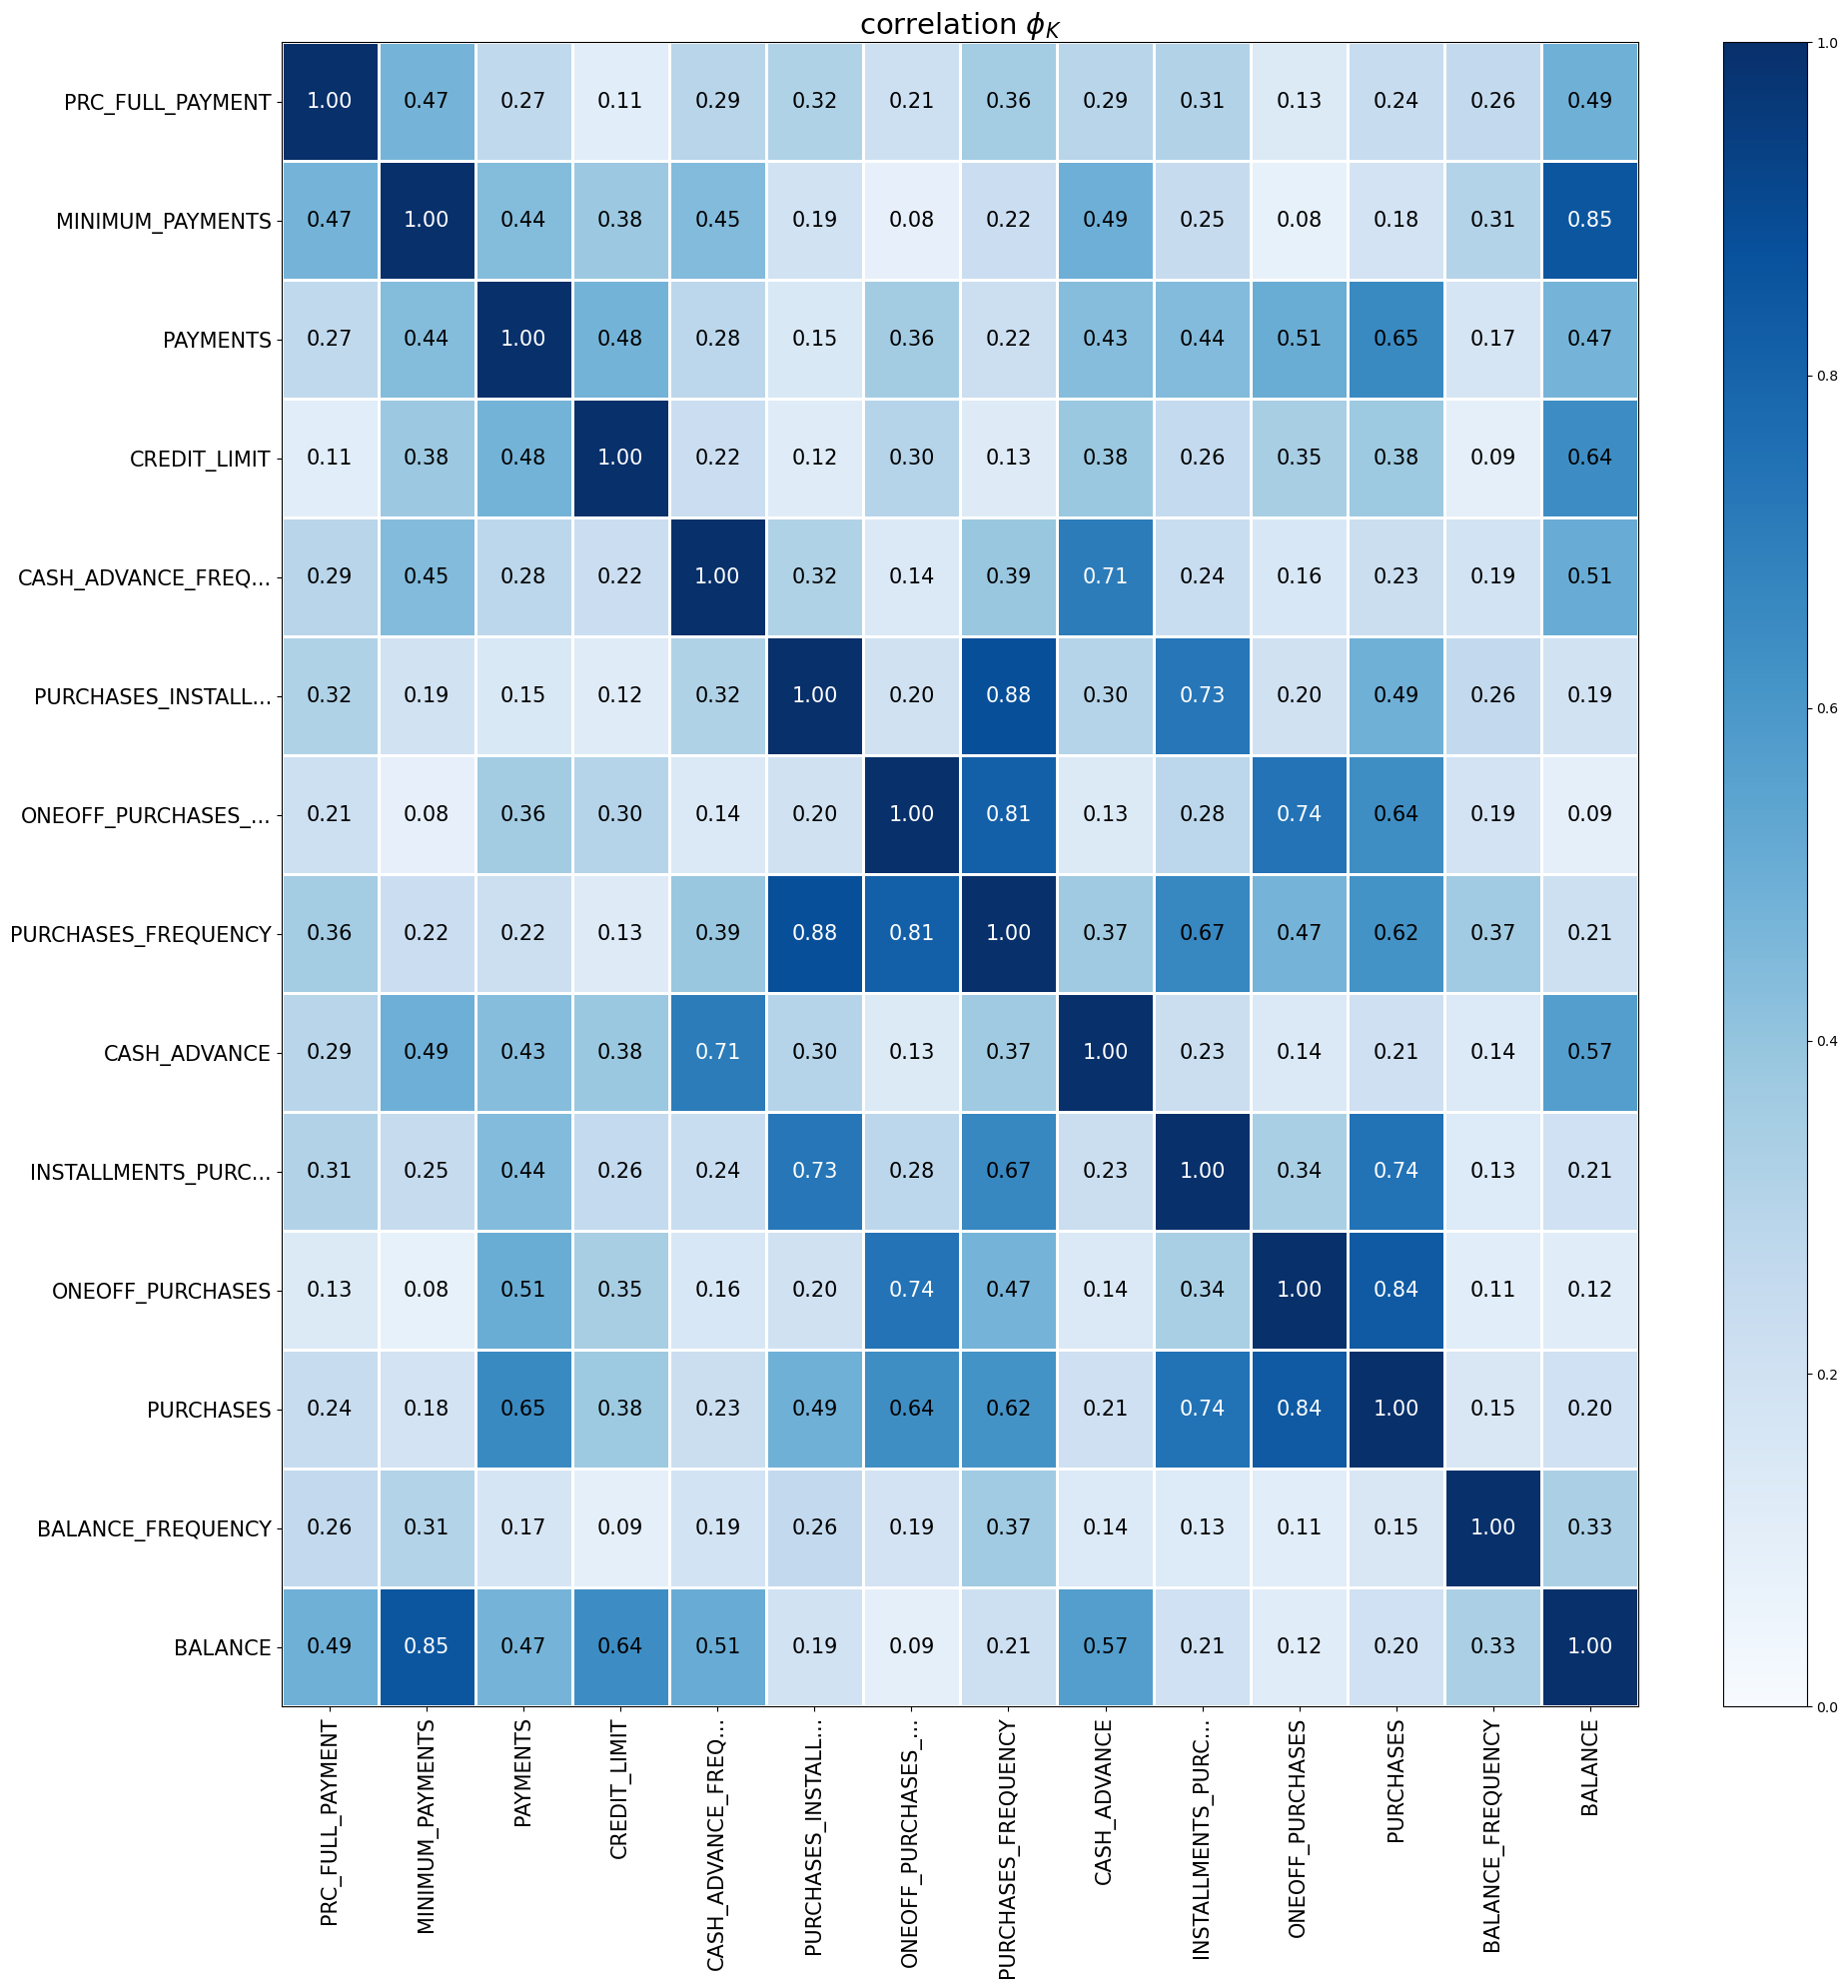

In [33]:
# Create function to correlate variables with default
def compute_phik_correlation(dataframe, columns):
    subset = dataframe[columns]
    correlation_matrix = subset.phik_matrix()
    return correlation_matrix

# Define the list of columns for each subset
columns = X.columns

# Compute Phi-K correlation for each set of columns and print
correlation = compute_phik_correlation(X, columns)

plot_correlation_matrix(correlation.values, x_labels=correlation.columns, y_labels=correlation.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(20,20))
plt.tight_layout()

Menurut website __[Andrews](https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm#:~:text=Correlation%20coefficients%20whose%20magnitude%20are%20between%200.7%20and%200.9%20indicate,can%20be%20considered%20moderately%20correlated.)__:
- Kolerasi bernilai antara `0.7` - `0.9` termasuk **highly colerated**
- Kolerasi bernilai antara `0.5` - `0.7` termasuk **moderately colerated**
- Kolerasi bernilai antara `0.3` - `0.5` termasuk **low colerated**

Dicari multicolinearity, yaitu dua variabel yang memiliki nilai korelasi tinggi, akan didrop salah satu kolom correlated yang termasuk kategori **highly colerated**, yaitu variabel `PURCHASES_INSTALLMENTS_FREQUENCY`, `ONEOFF_PURCHASES_FREQUENCY`, `CASH_ADVANCE_FREQUENCY`, `PURCHASES_FREQUENCY`, `INSTALLMENTS_PURCHASES`, `ONEOFF_PURCHASES`, `MINIMUM_PAYMENTS`.

In [34]:
X = X.drop(['PURCHASES_INSTALLMENTS_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES', 'MINIMUM_PAYMENTS'], axis=1)

interval columns not set, guessing: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT']


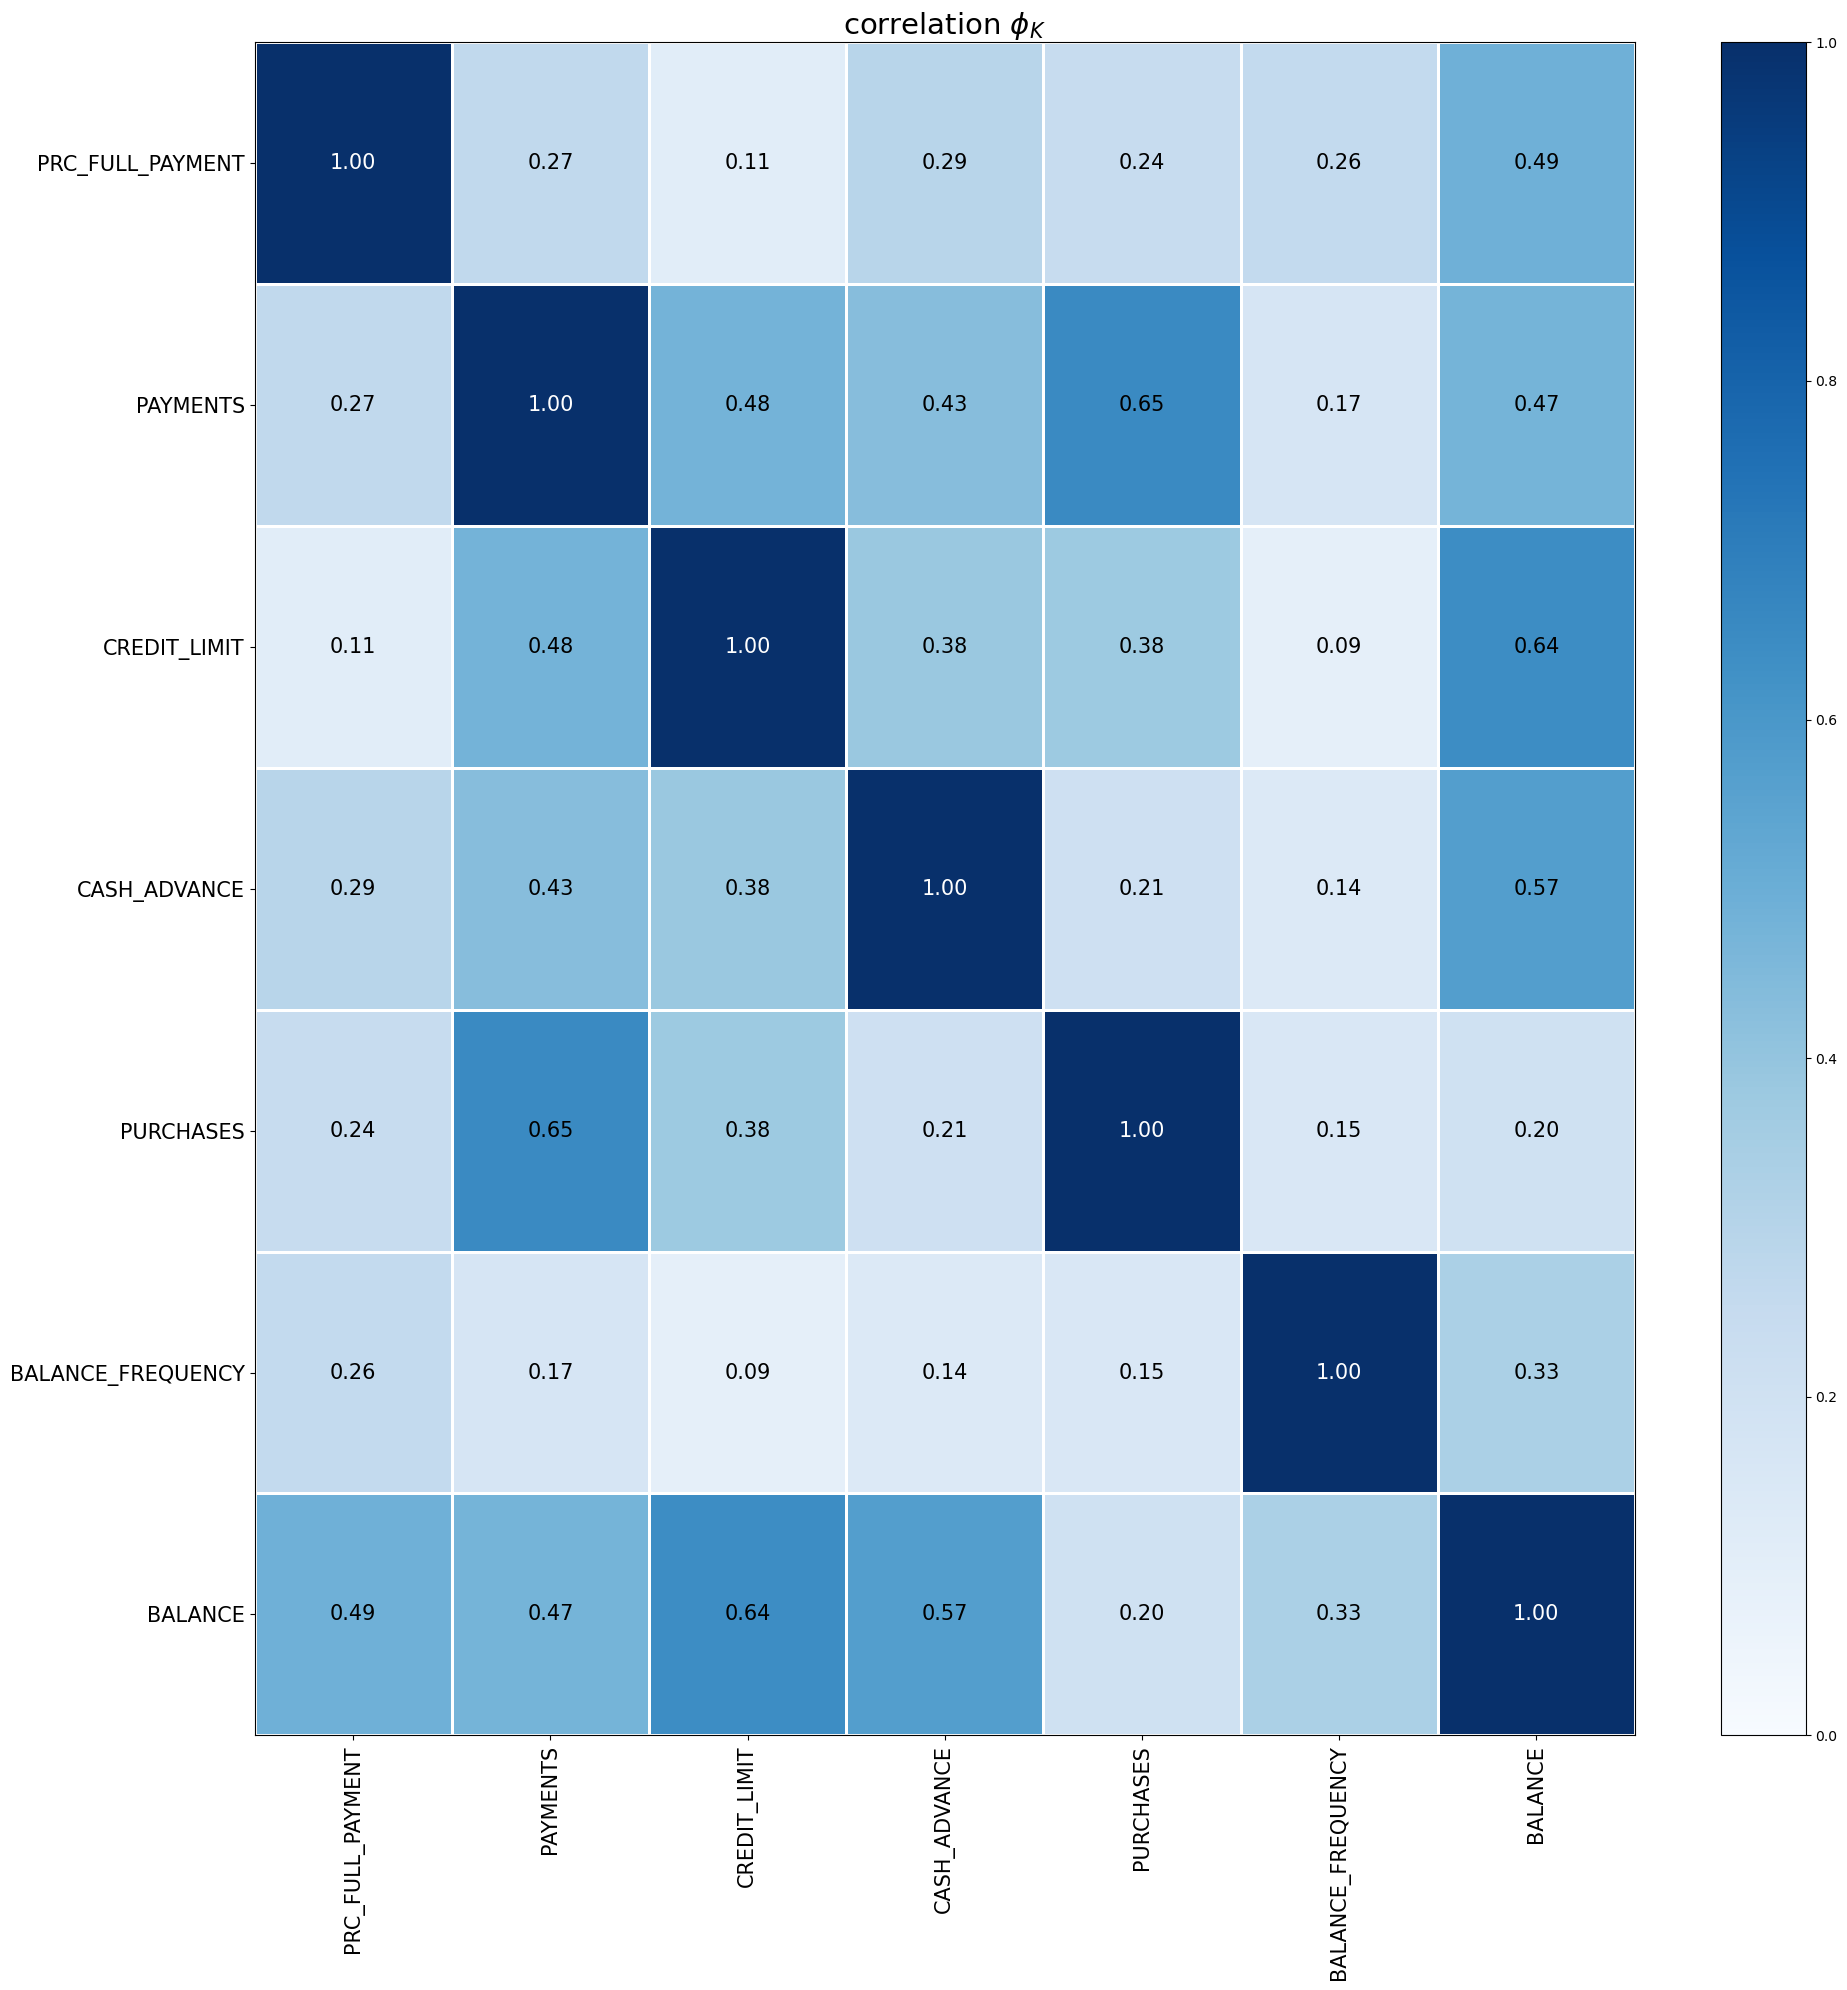

In [35]:
# Create function to correlate variables with default
def compute_phik_correlation(dataframe, columns):
    subset = dataframe[columns]
    correlation_matrix = subset.phik_matrix()
    return correlation_matrix

# Define the list of columns for each subset
columns = X.columns

# Compute Phi-K correlation for each set of columns and print
correlation = compute_phik_correlation(X, columns)

plot_correlation_matrix(correlation.values, x_labels=correlation.columns, y_labels=correlation.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(20,20))
plt.tight_layout()

Sudah tidak ada data yang highly correlated

## Scaling

In [36]:
X.skew()

BALANCE              1.715785
BALANCE_FREQUENCY   -1.437962
PURCHASES            1.785908
CASH_ADVANCE         1.674018
CREDIT_LIMIT         1.421481
PAYMENTS             1.728184
PRC_FULL_PAYMENT     1.440584
dtype: float64

Semua data masih bersifat skewed, maka menggunakan scaling MinMax

Pakai MinMax

In [37]:
#Scaling data menggunakan MinMax Scaler
scaler_minmax = MinMaxScaler()
X_scaled = scaler_minmax.fit_transform(X)

## PCA

In [38]:
pca = PCA()
pca.fit(X_scaled)

PCA()

Text(0, 0.5, 'Eigenvalues')

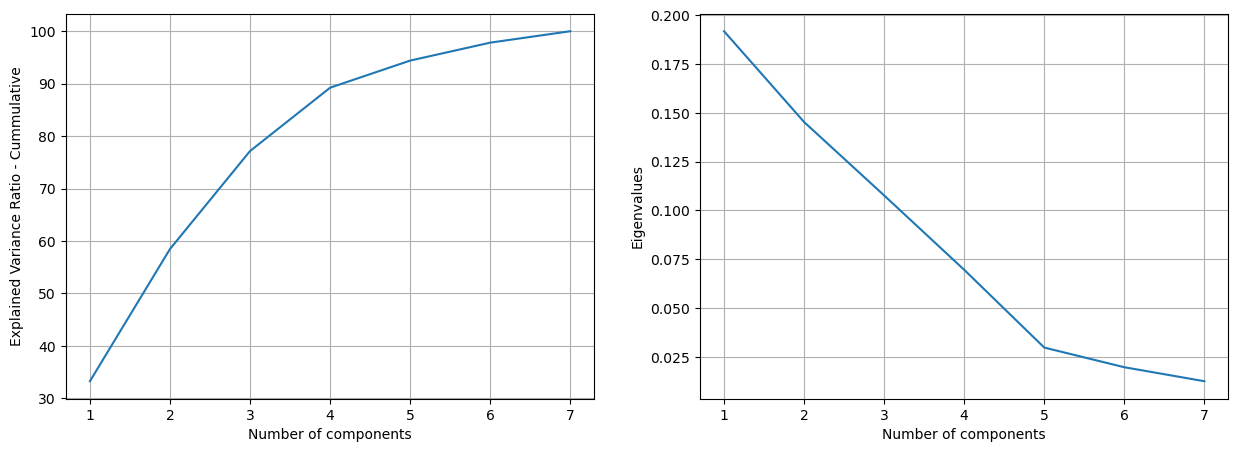

In [39]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

- Dari visualisasi Variance Ratio (bagian kiri), terdapat pembelokan tajam di jumlah komponen ke 4 dan 3. Hal ini menunjukkan bahwa dengan 4 komponen utama, sudah cukup untuk merepresentasikan sekitar 88% dari data asli. Juga untuk 3 komponen utama cukup untuk merepresntasikan sekitar 77% dari data. Pengurangan dimensi bisa dilakukan tanpa kehilangan informasi yang banyak
- Dari visualisasi Eigenvalues (bagian kanan), terdapat pembelokan tajam di jumlah komponen ke 5. Hal ini menunjukkan bahwa di atas 5 komponen, tidak bisa memberikan penjelasan varians yang lebih signifikan, maka batas jumlah komponen adalah 5

>Ingin diambil 3 komponen maka informasi yang diretain adalah sekitar 77%

In [40]:
# Check the number of features if we want to retain 77 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.77) + 1
num_features

3

Informasi yang ingin diretain adalah 77%, dan jumlah feature yang dipakai adalah 3

In [41]:
# train model dengan mengurangi dimensi menjadi 3 komponen

pca = PCA(n_components=3)
pca.fit(X_scaled)

X_scaled_pca = pca.transform(X_scaled)

# **VII. Model Definition**

Kasus ini akan menggunakan metode clustering K-Means. K-Means adalah metode clustering yang sederhana dan bertugas untuk membagi data ke dalam kelompok-kelompok berdasarkan pola dalam data. K-Means dapat menemukan titik tengah yang mewakili karakteristik perilaku pengguna kartu kredit seperti balance, jumlah pembelian dsb. Model ini juga cocok untuk data kontinu.

Pengambilan hyperparameter menggunakan Elbow Method dan Silhoutte Score.
Penilaian model menggunakan Silhoutte Score

# **VIII. Model Training**

## Elbow Method

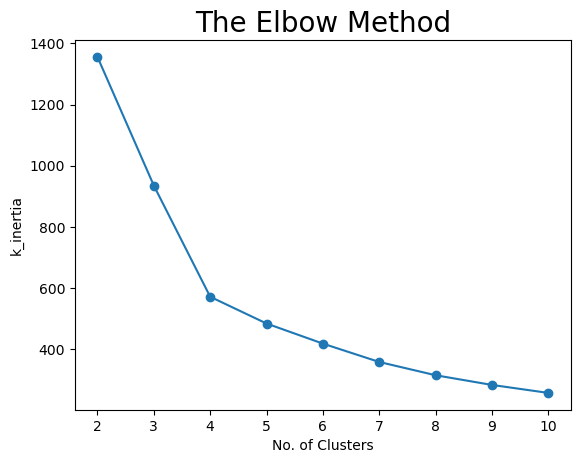

In [42]:
k_inertia = []
#membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(2, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
    km.fit(X_scaled_pca)
    k_inertia.append(km.inertia_)

plt.plot(range(2, 11), k_inertia, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('k_inertia')
plt.show()

Dari visualisasi, terlihat penurunan signifikan di sekitar cluster 2 sampai 8. Maka dijadikan pertimbangan, perlu diteliti lagi dengan Silhouette Score

## Silhouette Score

In [43]:
# Function to create Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.4037153580812404
For n_clusters = 3 The average silhouette_score is : 0.4657143828947228
For n_clusters = 4 The average silhouette_score is : 0.5033165652769296
For n_clusters = 5 The average silhouette_score is : 0.5089263794329363
For n_clusters = 6 The average silhouette_score is : 0.4278073059421244
For n_clusters = 7 The average silhouette_score is : 0.4346768770005837
For n_clusters = 8 The average silhouette_score is : 0.4572541255457419


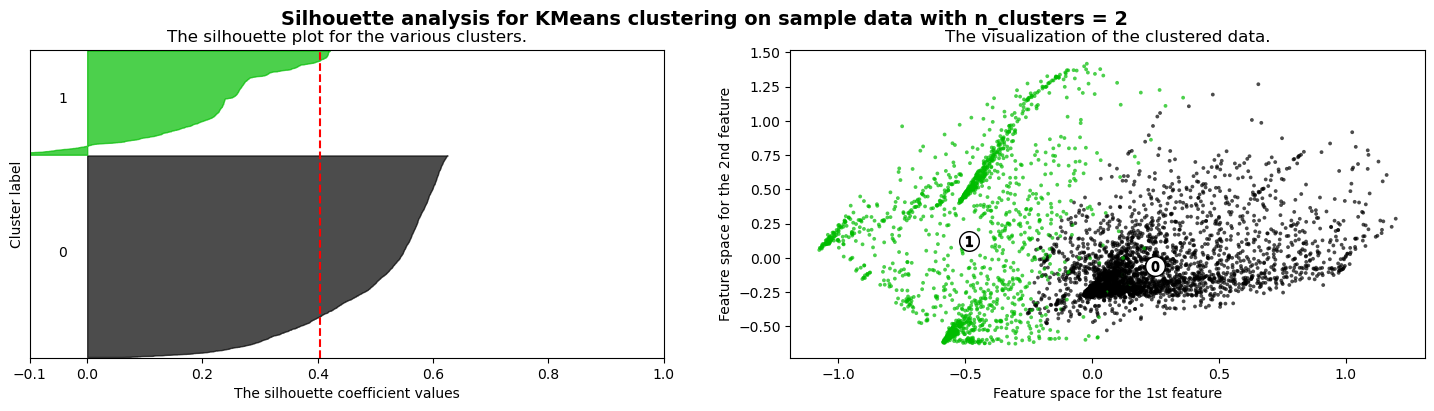

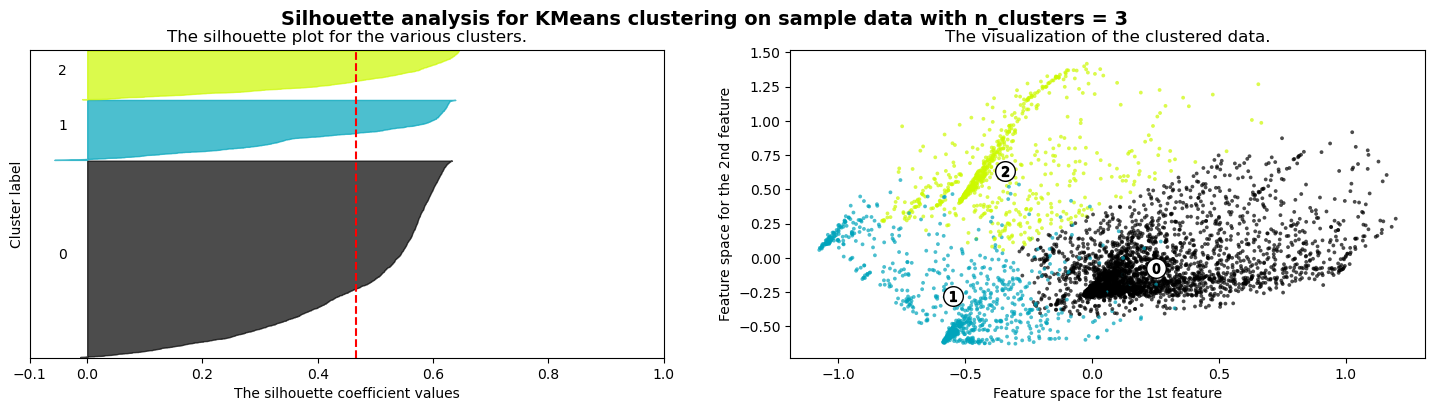

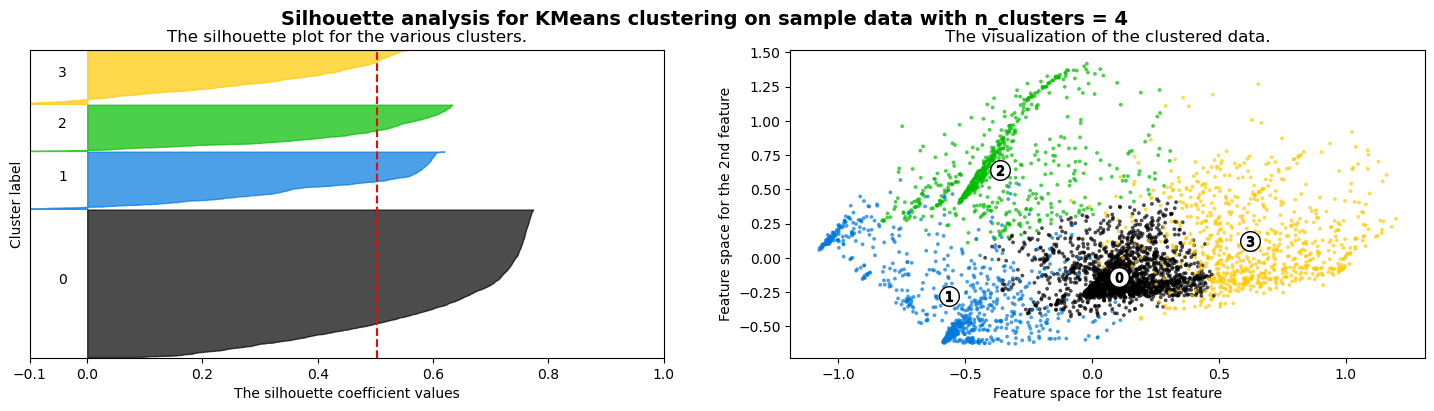

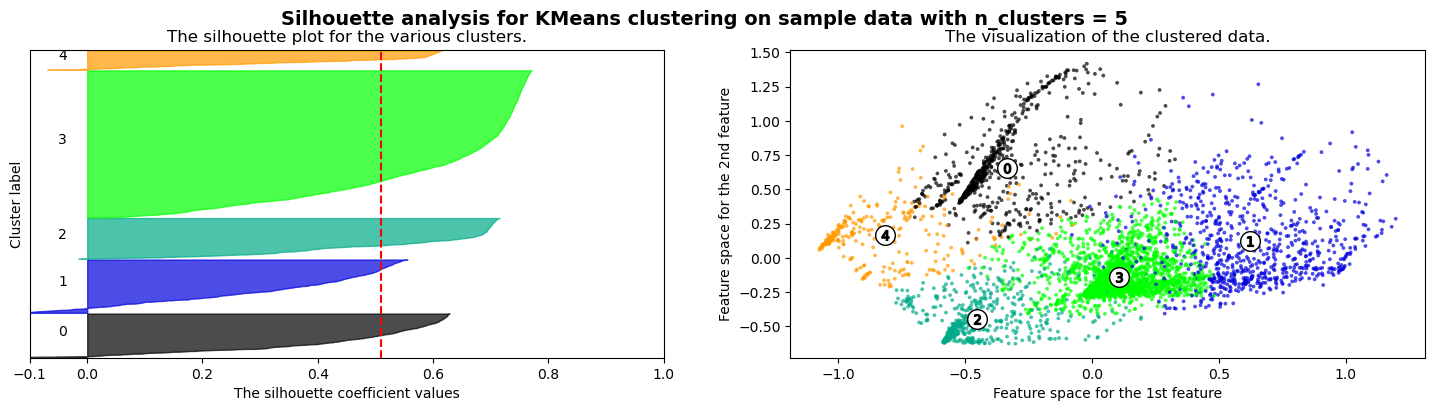

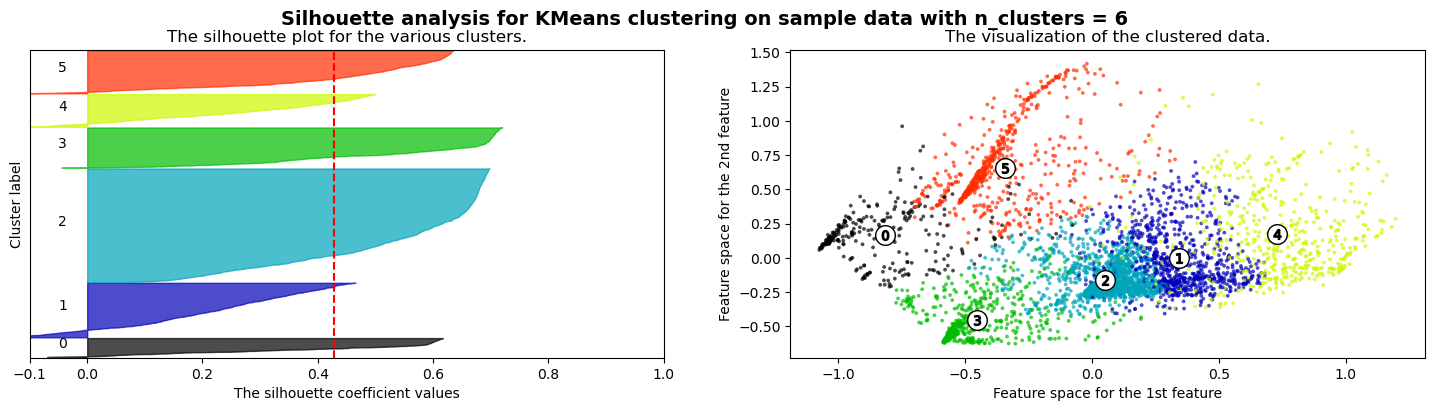

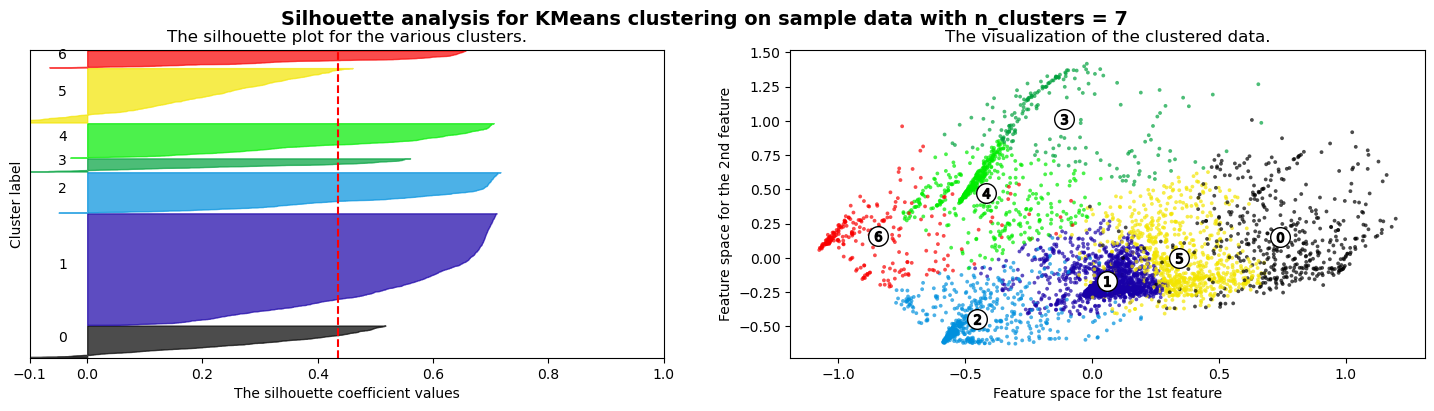

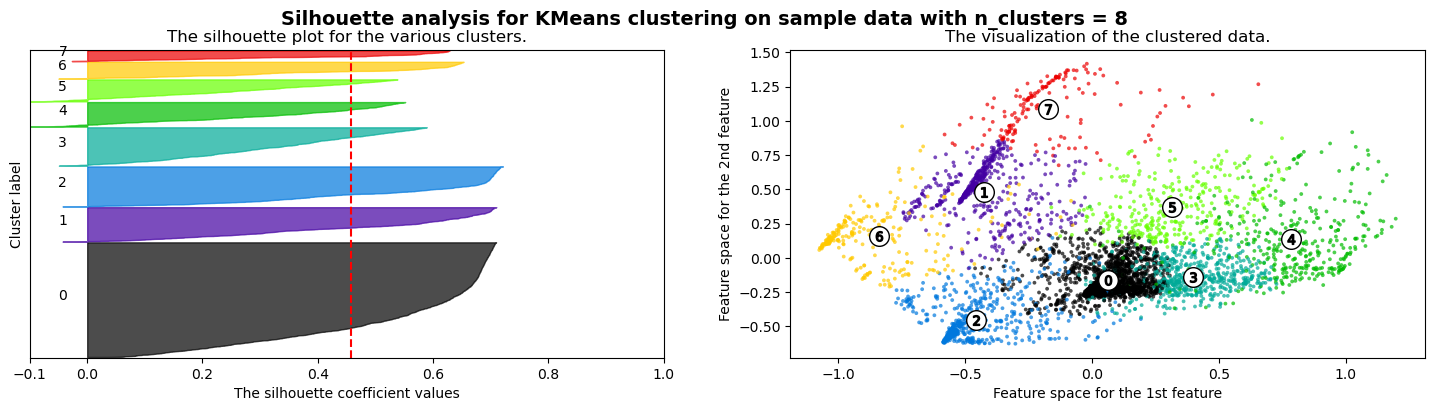

In [44]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, 9), X_scaled_pca, 3)

Silhoutte Score tertinggi adalah 5, dengan skor 0.508. Terlihat dari gambar pisau disebelah kiri, jumlah cluster dengan overlap paling sedikit adalah cluster 5. Karena itu akan diambil jumlah cluster yang terbaik yaitu 5 

## Final clusters, k = 5

In [56]:
#pembuatan model KMeans
km = KMeans(n_clusters = 5, random_state = 3)
km.fit(X_scaled_pca)

KMeans(n_clusters=5, random_state=3)

# **IX. Model Evaluation**

In [57]:
# prediksi dengan model
pred = km.predict(X_scaled_pca)
pred

array([2, 2, 3, ..., 3, 3, 0])

In [58]:
# Menggabungkan hasil clustering dengan data asli

df_kmeans = df.copy()
df_kmeans['cluster'] = pred
df_kmeans.head(10)

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3091    3.833185           0.125000      45.00             45.00   
1     5069    0.000000           0.000000     176.03            176.03   
2     6075  757.964752           0.875000     157.40            157.40   
3     6291  264.566591           0.375000    1150.00           1150.00   
4     7755  440.613643           1.000000     600.00            600.00   
5     8299  611.561026           1.000000     765.00            765.00   
6     8629    0.228572           0.125000      60.00             60.00   
7     8805  105.333584           0.375000     306.00            306.00   
8        7   16.379412           0.454545     178.15              0.00   
9       91  559.151424           1.000000      94.00             94.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00           0.0                0.125   
1                    0.00           0.0                0.125   
2                    0.00           0.0                0.125   
3                    0.00           0.0                0.125   
4                    0.00           0.0                0.125   
5                    0.00           0.0                0.125   
6                    0.00           0.0                0.125   
7                    0.00           0.0                0.125   
8                  178.15           0.0                0.250   
9                    0.00           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                              0.00   
1                       0.125                              0.00   
2                       0.125                              0.00   
3                       0.125                              0.00   
4                       0.125                              0.00   
5                       0.125                              0.00   
6                       0.125                              0.00   
7                       0.125                              0.00   
8                       0.000                              0.25   
9                       0.250                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   
5                     0.0                 0              1        2000.0   
6                     0.0                 0              1        1500.0   
7                     0.0                 0              2        6000.0   
8                     0.0                 0              3        5000.0   
9                     0.0                 0              3        5500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0     0.000000               NaN          0.000000       8        2  
1     0.000000               NaN          0.000000       8        2  
2  1494.480376       2638.598410          0.000000       8        3  
3  3029.380326         85.428885          0.000000       8        2  
4   215.316424        137.846006          0.000000       8        3  
5   204.464151        146.352314          0.000000       8        3  
6   438.738982               NaN          0.000000       8        2  
7   101.986927        118.324082          0.000000       8        2  
8   229.376368         89.613822          0.181818      12        2  
9   254.733329        218.279194          0.000000      12        3

## EDA After Clustering

### Visualisasi Hasil Cluster

<Axes: >

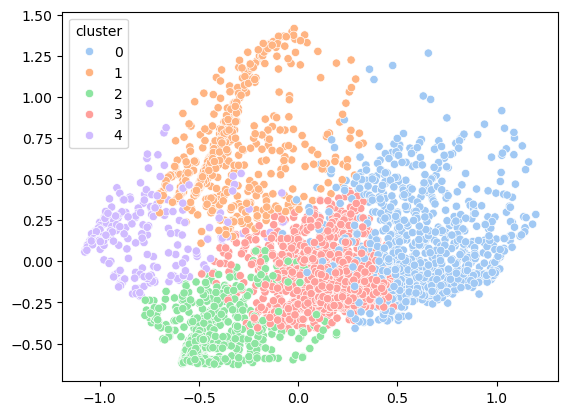

In [59]:
#menunjukkan distribusi cluster
pca_2d = PCA(n_components=2)
pca_2d.fit(X_scaled)

X_scaled_pca_2d = pca_2d.fit_transform(X_scaled)

#scatter PC1 & PC2
sns.scatterplot(x=X_scaled_pca_2d[:,0], y=X_scaled_pca_2d[:,1], hue=df_kmeans['cluster'], palette='pastel')

Dari visualisasi clustering, data bisa terkumpul dengan baik. Terlihat jelas pengelompokan antar data, meskipun masih ada cukup banyak overlap, terutama pada cluster 0. K-Means adalah model yang cocok untuk pengelompokan data ini

### Pemeriksa Keseimbangan Data

In [49]:
df_kmeans['cluster'].value_counts()

cluster
3    2162
0     789
1     640
2     601
4     283
Name: count, dtype: int64

- **Cluster 3** memiliki jumlah anggota yang jauh lebih banyak dibandingkan cluster lainnya. Menunjukkan bahwa data pada cluster ini memiliki pola atau karakteristik yang lebih umum atau dominan
- **Cluster 4** hanya memiliki 283 anggota, jauh lebih kecil dibandingkan cluster lainnya. Cluster ini berisi customer dengan pola yang unik atau ekstrem

Dapat disimpulkan bahwa adanya ketidakseimbangan data, hal ini bisa terjadi kemungkinan karena karakteristik dari data asli, di mana ada kelompok dengan perilaku yang dominan.

### Apakah cluster dengan nilai saldo tinggi juga memiliki kapasitas kredit yang tinggi dan juga melakukan pembelian yang banyak?

             BALANCE    PURCHASES  CREDIT_LIMIT
cluster                                        
0        4680.414336  1750.202712   8110.398663
1         302.180285  2367.205078   5221.015625
2         237.707294   324.202196   3464.189314
3        1359.016541   571.296559   3258.140611
4          99.107570   578.232827   4409.715708


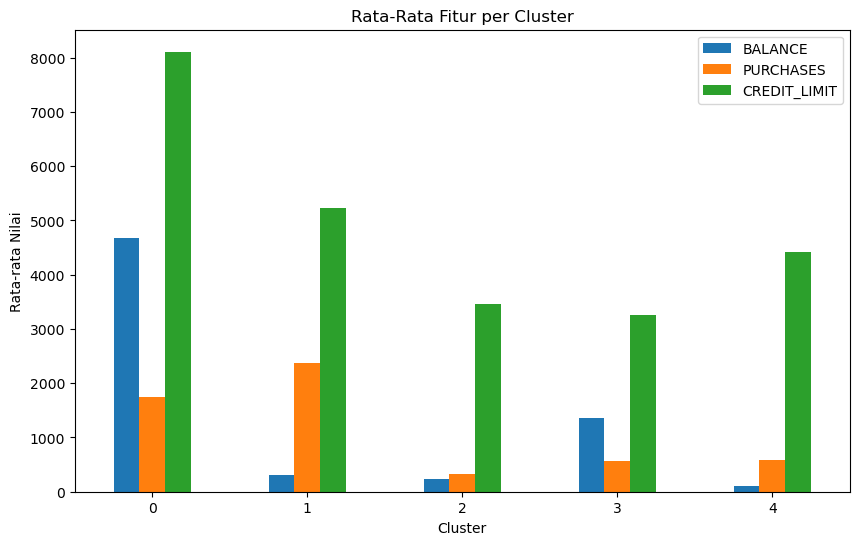

In [50]:
avg_cluster = df_kmeans.groupby('cluster')[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']].mean()

# hasil rata-rata
print(avg_cluster)

# Visualisasi bar plot
avg_cluster.plot(kind='bar', figsize=(10,6))
plt.title('Rata-Rata Fitur per Cluster')
plt.ylabel('Rata-rata Nilai')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.show()

- **Cluster 0** menunjukkan pelanggan dengan saldo rata-rata yang tinggi dan credit limit yang juga tinggi. Meskipun `PURCHASES` mereka tidak tinggi, tapi `CREDIT_LIMIT` yang tinggi menunjukkan bahwa meskipun mereka tidak sepenuhnya memanfaatkan kartu kredit mereka, mereka memiliki kapasitas kredit yang besar.
- **Cluster 1** menunjukkan pelanggan dengan saldo yang rata-rata yang rendah tetapi pembelian yang cukup tinggi. Meskipun credit limit mereka sedang, mereka cenderung melakukan pembelian lebih banyak daripada saldo yang mereka miliki. Hal ini bisa menunjukkan pelanggan yang aktif menggunakan kartu kredit mereka meskipun tidak memiliki banyak saldo.
- **Cluster 2** menunjukkan pelanggan dengan saldo, pembelian, dan batas kredit yang rendah. Pelanggan dalam cluster ini kurang aktif dalam penggunaan kartu kredit mereka dan memiliki kapasitas kredit yang terbatas. Mereka mungkin lebih cenderung untuk tidak aktif menggunakan kartu kreditnya.
- **Cluster 3** menunjukkan pelanggan dengan saldo dan batas kredit sedang, namun dengan pembelian yang lebih rendah. Pelanggan dalam cluster ini memiliki kapasitas kredit yang cukup, tetapi cenderung tidak melakukan banyak pembelian atau memanfaatkan fasilitas kredit mereka secara penuh.
- **Cluster 4** menunjukkan pelanggan dengan saldo yang sangat rendah tetapi pembelian yang sedang dan batas kredit yang sedang. Meskipun saldo mereka rendah, pembelian yang dilakukan berjumlah sedang. Hal ini bisa menunjukkan pelanggan yang menggunakan fasilitas kredit meskipun memiliki saldo yang terbatas.

`BALANCE` yang tinggi tidak memastikan bahwa pembelian dan credit limit juga tinggi, nilainya per-cluster bervariasi

### Apakah ada cluster yang lebih cenderung menggunakan uang tunai dibandingkan transaksi pembelian?

         CASH_ADVANCE    PURCHASES  INSTALLMENTS_PURCHASES  PRC_FULL_PAYMENT
cluster                                                                     
0         3752.502991  1750.202712              638.574360          0.025849
1          101.848645  2367.205078              973.296234          0.663679
2          525.818577   324.202196              124.720915          0.027298
3          460.946513   571.296559              251.928039          0.018573
4          233.922123   578.232827              266.599859          0.602616


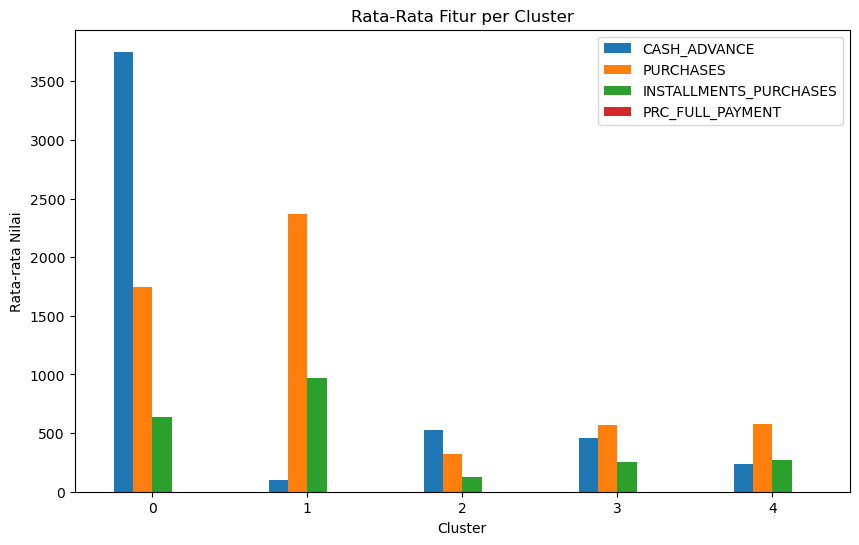

In [51]:
# Menghitung rata-rata CASH_ADVANCE dan PURCHASES untuk setiap cluster
cluster_summary = df_kmeans.groupby('cluster')[['CASH_ADVANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'PRC_FULL_PAYMENT']].mean()
print(cluster_summary)

cluster_summary.plot(kind='bar', figsize=(10,6))
plt.title('Rata-Rata Fitur per Cluster')
plt.ylabel('Rata-rata Nilai')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.show()

- **Cluster 0** memiliki rata-rata `CASH_ADVANCE` yang sangat tinggi dibandingkan dengan `PURCHASES` dan `INSTALLMENTS_PURCHASES`. Nasabah di cluster ini cenderung lebih banyak melakukan penarikan uang tunai daripada melakukan pembelian barang atau jasa. PRC_FULL_PAYMENT yang sangat rendah, 2.58% menunjukkan bahwa nasabah di cluster ini jarang melakukan pembayaran penuh.
- **Cluster 1** menunjukkan rata-rata `PURCHASES` yang jauh lebih tinggi dibandingkan `CASH_ADVANCE`. Nasabah di cluster ini lebih cenderung menggunakan kartu kredit untuk pembelian barang atau jasa, dengan beberapa transaksi dilakukan dengan cicilan. PRC_FULL_PAYMENT cukup tinggi, bernilai  66.37%. Menunjukkan bahwa nasabah di cluster ini lebih mampu membayar utangnya secara penuh setiap bulan
- **Cluster 2** memiliki rata-rata `CASH_ADVANCE` yang lebih tinggi dibandingkan dengan `PURCHASES` dan `INSTALLMENTS_PURCHASES`, tetapi tidak setinggi cluster 0. Cenderung lebih sering melakukan penarikan uang tunai daripada pembelian barang atau jasa.  PRC_FULL_PAYMENT yang rendah, 2.73%. menunjukkan bahwa nasabah di cluster ini lebih sering tidak melakukan pembayaran penuh terhadap utangnya.
- **Cluster 3** menunjukkan `PURCHASES` yang lebih tinggi dibandingkan `CARD_ADVANCE` dan `INSTALLMENTS_PURCHASES`, tetapi tidak sebanyak cluster 0 dan 2. PRC_FULL_PAYMENT yang sangat rendah (1.86%) menunjukkan pengguna di cluster ini juga jarang membayar saldo mereka.
- **Cluster 4** menggunakan `CASH_ADVANCE` dengan relatif lebih rendah, lebih cenderung melakukan pembelian barang atau jasa, dan memiliki tingkat pembayaran penuh yang cukup tinggi (60.26%).

### Apakah ada cluster dengan minimum payments yang lebih tinggi atau rendah dari cluster lainnya?

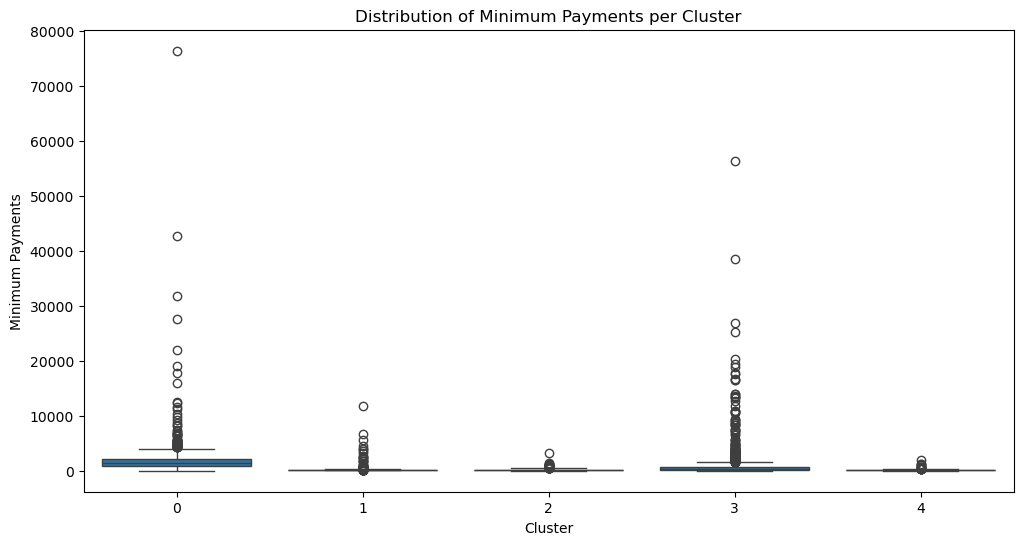

In [52]:
# membuat boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='MINIMUM_PAYMENTS', data=df_kmeans)
plt.title('Distribution of Minimum Payments per Cluster')
plt.ylabel('Minimum Payments')
plt.xlabel('Cluster')
plt.show()

Cluster 0 memiliki minimum payments yang lebih besar dari cluster lainnya, diikuti oleh cluster 3, lalu 1. Cluster 2 dan 4 memiliki minimal payments yang relatif sama

### Kesimpulan Model

Model K-Means sudah cocok untuk data ini dan bisa menghasilkna Silhoutte Score 0.508. 
Dari Analisa ingin memberikan label pada setiap cluster:
- Cluster 0: **Kapasitas Kredit Tinggi dan Penggunaan Uang Tunai**

    Saldo dan credit limit yang tinggi, dengan pembelian yang cukup rendah, namun melakukan penarikan uang tunai yang banyak. Meskipun demikian, mereka jarang melakukan pembayaran penuh.
- Cluster 1: **Aktif dengan Pembelian dan Pembayaran Penuh**

    Saldo rendah, namun melakukan pembelian yang tinggi dan mampu membayar utangnya secara penuh. Memiliki penggunaan kartu kredit yang tinggi.
- Cluster 2: **Kurang Aktif dengan Pembelian dan Saldo Rendah**

    Saldo, batas kredit, dan pembelian yang rendah. Jarang menggunakan kartu kredit mereka secara maksimal.
- Cluster 3: **Pembelian Rendah dan Kapasitas Kredit Cukup**

    Saldo dan batas kredit yang sedang, dengan pembelian yang juga rendah. Pembayaran penuh jarang dilakukan, dan mereka cenderung tidak memanfaatkan kartu kredit mereka.
- Cluster 4: **Saldo Rendah dan Pembelian Sedang**

    Saldo rendah tetapi melakukan pembelian dengan jumlah sedang, dengan pembayaran yang cukup baik.

# **X. Model Saving**

In [53]:
#Menyimpan kolom pada X
num_cols = X.columns.tolist()

In [54]:
#Save Files

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_cols, file_1)

with open('scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler_minmax, file_2)

with open('pca.pkl', 'wb') as file_3:
  pickle.dump(pca, file_3)

with open('kmeans.pkl', 'wb') as file_4:
  pickle.dump(km, file_4)

# **XI. Pengambilan Kesimpulan**

## Kesimpulan EDA
- Secara keseluruhan, tampak bahwa ada tren peningkatan dalam `PURCHASES`, `BALANCE`, dan `PAYMENTS` pada pelanggan dengan `TENURE` yang lebih tinggi. Ini menunjukkan bahwa pelanggan lama cenderung lebih banyak menggunakan kartu kredit mereka dan memiliki saldo yang lebih tinggi, yang bisa meningkatkan profit untuk bank. Alasan dari pola ini bisa karena:
    - Setelah menggunakan kartu kredit selama beberapa tahun, nasabah cenderung merasa lebih nyaman dan percaya dalam menggunakan kartu untuk melakukan pembelian lebih besar.
    - Seiring berjalannya waktu, customer mungkin menjadi lebih terampil dalam mengelola BALANCE dan PAYMENTS mereka.
- Pola yang ditemukan menunjukkan bahwa nasabah dengan CREDIT_LIMIT yang lebih tinggi cenderung melakukan lebih banyak pembelian. Beberapa alasan yang memungkinkan pola ini adalah:
    - Nasabah dengan `CREDIT_LIMIT` tinggi memiliki lebih banyak keluasan secara finansial untuk melakukan pembelian dalam jumlah besar dan juga bisa lebih sering
    - Nasabah dengan kredit lebih tinggi mungkin lebih sering menggunakan kartu kredit untuk memenuhi kebutuhan sehari - hari mereka yang berjumlah lebih besar.

Rekomendasi:
- Penawaran eksklusif atau rewards untuk mempertahankan loyalitas pengguna kartu kredit dan meningkatkan frekuensi transaksi.
- Promosi premium atau cashback yang mendorong penggunaan lebih besar, memanfaatkan kemampuan mereka untuk bertransaksi lebih banyak. Nasabah dengan kapasitas kredit menengah dapat diberi penawaran yang mendorong mereka untuk meningkatkan penggunaan kartu kredit mereka, seperti program poin atau diskon.

## Kesimpulan Model
Model Clustering dibagi menjadi 5 kelompok, dengan Silhoutte Score 0.508. Nilai Silhoutte score biasanya memiliki rentang antara -1 sampai 1. Maka model ini bisa dianggap cukup baik. Terbukti bahwa Algoritma K-Means sudah cocok dalam mengelompokkan data ini. 

Akan tetapi memiliki kelemahan yaitu ada banyak cluster yang overlapping, terutama pada cluster 1.  Hal ini disebabkan oleh sifat algoritma yang mengandalkan jarak Euclidean dan tidak selalu menangani batas cluster yang tidak linier dengan baik. Kemungkinan juga ini terjadi karena masih ada banyaknya outlier. yang terlihat pada visualisasi Ada beberapa hal yang bisa dilakukan untuk mengatasi ini:
- Menggunakan algoritma lain yang lebih robust
- Menggunakan Elbow Method untuk memilih berbagai variasi dari K dan bandingkan hasilnya menggunakan evaluasi setiap cluster.
- Sempurnakan lagi Handling Outlier-nya

## Kesimpulan EDA setelah Clustering
- Ada ketidakseimbangan di antara cluster, dengan cluster 3 yang jauh lebih besar dibandingkan yang lainnya, menunjukkan bahwa sebagian besar pelanggan memiliki karakteristik yang lebih umum. Di sisi lain, Cluster 4 adalah yang terkecil dan berisi pola yang lebih ekstrim.
- Saldo tinggi tidak selalu berhubungan dengan batas kredit atau pembelian yang tinggi. Pembelian dan penggunaan kartu kredit sangat bervariasi antar cluster.
- Beberapa cluster lebih cenderung melakukan penarikan tunai dibandingkan dengan pembelian barang atau jasa.
- Cluster 0 dengan minimum payments yang tinggi bisa menjadi tanda pelanggan dengan kebutuhan tarik tunai yang tinggi, sementara Cluster 1 menunjukkan nasabah yang lebih mampu membayar saldo hutang mereka secara penuh.

Rekomendasi:
- Memberikan penawaran yang lebih personal dan sesuai dengan kebutuhan finansial pelanggan di setiap cluster sehingga lebih efektif daripada pendekatan umum. Contohnya Cluster 0 yaitu Kapasitas Kredit Tinggi dan Penggunaan Uang Tunai, lebih baik fokus pada penawaran produk dengan reward untuk tarik tunai, seperti promosi bebas biaya tarik tunai untuk periode tertentu atau program cashback untuk penggunaan cash advance.
- Edukasi mengenai pembayaran penuh dan pengelolaan utang dapat mengurangi resiko bagi customer dan memperkuat loyalitas. Program yang meningkatkan penggunaan kartu kredit, seperti reward dan diskon khusus, juga dapat meningkatkan keaktifan customer.